# Predict Failure of the Pump

## Step 1 Problem Identification

#### Problem Statement: 
    Detect anomalies in the sensor readings from the pump sensors and predict the next failure of the pump with at least 
    75% accuracy. 
        
#### Context:

    Company XYZ operates a water distribution plant that supplies water to the town of ABC. The water distribution system 
    consists of number of pumps and one of the main pumps failed 7 times last year which resulted in an interruption of 
    water supplly for the households in the town and lead to some serious health problems for number of families. The team 
    of reliability engineers could not see any pattern in the data when the system failed and therefore could not identify 
    the cause of the problem. In order to prevent the same failure from happening in the future again, the XYZ company 
    wants to be able to detect the potential issue in advance and be able to control and mitigate the risk of failure. 
    There is one particular pump that is the most important and is equiped with 51 sensors which measure different types of 
    functionalities of the pump. 

#### Criteria For Success:
    A model that predicts with at least 75% accuracy and generalizes on other samples without underfitting or overfitting.

#### Scope of the Solution Space:
    The scope of this project is limited to developing a model that detects anomalies and predicts failures of water pumps 
    based on raw sensor data. The model will not be intended to be used for detecting credit frauds or any other use cases 
    outside the scope of this project. 

#### Contraints:
    Data set is limited to the sensor readings from a single pump hence may not be the best representation of all the 
    pumps. Computing power might become a constraint for effectively visualizing all 51 features at the same time.

#### Stakeholders:
    Samwell Tarly - Maintenance Manager of the XYZ Company

#### Data:
    The data set is sourced from https://www.kaggle.com/nphantawee/pump-sensor-data and consists of 51 numerical features 
    and a categorical label. 51 numerical features contain raw sensor readings from 51 different sensors that are used to 
    do condition monitoring of the pump.The label contains string values that represent normal, broken and recovering 
    operational conditions of the pump. The data set represents 219,521 readings from 51 sensors.   

#### Solution Approach: 

    I will solve this problem by developing a classification model that detects anomalies from the sensor readings and 
    accordingly predicts the potential failure of the pump. To do that, I will first apply an appropriate unsupervised 
    learning techniques to undertake dimensionality reduction for the effective visualization of the data and EDA. Then I 
    will train classification models and will use cross-validation to evaluate their performance to select the best model.

#### Project Deliverables: 
    The deliverables include an app that takes certain features in certain format from a pump and predicts next failure, as 
    well as a slide deck that explains how the app was developed and verified. In addition, all the code will be available 
    in a Jupyter notebook in a GitHub repo for each step of the project.

## Step 3 Exploratory Data Analysis

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

#### 3.1: Load the data 

In [2]:
os.getcwd()

'C:\\Users\\Bauyrjan.Jyenis\\Capstone2_Project\\capstone\\notebooks'

In [3]:
path = 'C:\\Users\\Bauyrjan.Jyenis\\Capstone2_Project\\capstone\\data\\processed'
os.chdir(path)

In [63]:
# import the tidy data from the Step #2
df=pd.read_csv('sensor_data.csv')

In [30]:
df.shape

(220320, 55)

In [31]:
df

Unnamed: 0            timestamp  sensor_00  sensor_01  sensor_02  \
0                0  2018-04-01 00:00:00   2.465394   47.09201  53.211800   
1                1  2018-04-01 00:01:00   2.465394   47.09201  53.211800   
2                2  2018-04-01 00:02:00   2.444734   47.35243  53.211800   
3                3  2018-04-01 00:03:00   2.460474   47.09201  53.168400   
4                4  2018-04-01 00:04:00   2.445718   47.13541  53.211800   
...            ...                  ...        ...        ...        ...   
220315      220315  2018-08-31 23:55:00   2.407350   47.69965  50.520830   
220316      220316  2018-08-31 23:56:00   2.400463   47.69965  50.564240   
220317      220317  2018-08-31 23:57:00   2.396528   47.69965  50.520830   
220318      220318  2018-08-31 23:58:00   2.406366   47.69965  50.520832   
220319      220319  2018-08-31 23:59:00   2.396528   47.69965  50.520832   

        sensor_03   sensor_04  sensor_05  sensor_06  sensor_07  ...  \
0       46.310760  634.375000   76.45975   13.41146   16.13136  ...   
1       46.310760  634.375000   76.45975   13.41146   16.13136  ...   
2       46.397570  638.888900   73.54598   13.32465   16.03733  ...   
3       46.397568  628.125000   76.98898   13.31742   16.24711  ...   
4       46.397568  636.458300   76.58897   13.35359   16.21094  ...   
...           ...         ...        ...        ...        ...  ...   
220315  43.142361  634.722229   64.59095   15.11863   16.65220  ...   
220316  43.142361  630.902771   65.83363   15.15480   16.70284  ...   
220317  43.142361  625.925903   67.29445   15.08970   16.70284  ...   
220318  43.142361  635.648100   65.09175   15.11863   16.56539  ...   
220319  43.142361  639.814800   65.45634   15.11863   16.65220  ...   

        sensor_43  sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  \
0        41.92708  39.641200   65.68287   50.92593  38.194440   157.9861   
1        41.92708  39.641200   65.68287   50.92593  38.194440   157.9861   
2        41.66666  39.351852   65.39352   51.21528  38.194443   155.9606   
3        40.88541  39.062500   64.81481   51.21528  38.194440   155.9606   
4        41.40625  38.773150   65.10416   51.79398  38.773150   158.2755   
...           ...        ...        ...        ...        ...        ...   
220315   38.28125  68.287030   52.37268   48.32176  41.087960   212.3843   
220316   38.28125  66.840280   50.63657   48.03241  40.798610   213.8310   
220317   39.06250  65.393520   48.90046   48.03241  40.798610   217.3032   
220318   40.62500  64.236110   47.74306   48.32176  40.509258   222.5116   
220319   41.40625  62.789350   46.29630   48.90046  40.219910   227.4306   

        sensor_49  sensor_50  sensor_51  machine_status  
0        67.70834   243.0556   201.3889          NORMAL  
1        67.70834   243.0556   201.3889          NORMAL  
2        67.12963   241.3194   203.7037          NORMAL  
3        66.84028   240.4514   203.1250          NORMAL  
4        66.55093   242.1875   201.3889          NORMAL  
...           ...        ...        ...             ...  
220315  153.64580        NaN   231.1921          NORMAL  
220316  156.25000        NaN   231.1921          NORMAL  
220317  155.38190        NaN   232.0602          NORMAL  
220318  153.93520        NaN   234.0856          NORMAL  
220319  150.46300        NaN   234.0856          NORMAL  

[220320 rows x 55 columns]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

#### 3.2: Cleaning of the data and Pre-processing before performing an EDA

In [35]:
del df['Unnamed: 0']

In [38]:
# Let's convert the data type of timestamp column to datatime format
df['date'] = pd.to_datetime(df['timestamp'])

In [39]:
df.head()

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
0  2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
1  2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2  2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
3  2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
4  2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_44  sensor_45  \
0   76.45975   13.41146   16.13136   15.56713  ...  39.641200   65.68287   
1   76.45975   13.41146   16.13136   15.56713  ...  39.641200   65.68287   
2   73.54598   13.32465   16.03733   15.61777  ...  39.351852   65.39352   
3   76.98898   13.31742   16.24711   15.69734  ...  39.062500   64.81481   
4   76.58897   13.35359   16.21094   15.69734  ...  38.773150   65.10416   

   sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  sensor_51  \
0   50.92593  38.194440   157.9861   67.70834   243.0556   201.3889   
1   50.92593  38.194440   157.9861   67.70834   243.0556   201.3889   
2   51.21528  38.194443   155.9606   67.12963   241.3194   203.7037   
3   51.21528  38.194440   155.9606   66.84028   240.4514   203.1250   
4   51.79398  38.773150   158.2755   66.55093   242.1875   201.3889   

   machine_status                date  
0          NORMAL 2018-04-01 00:00:00  
1          NORMAL 2018-04-01 00:01:00  
2          NORMAL 2018-04-01 00:02:00  
3          NORMAL 2018-04-01 00:03:00  
4          NORMAL 2018-04-01 00:04:00  

[5 rows x 55 columns]

In [40]:
df.set_index('date', inplace=True)

In [42]:
df.head()

timestamp  sensor_00  sensor_01  sensor_02  \
date                                                                        
2018-04-01 00:00:00  2018-04-01 00:00:00   2.465394   47.09201    53.2118   
2018-04-01 00:01:00  2018-04-01 00:01:00   2.465394   47.09201    53.2118   
2018-04-01 00:02:00  2018-04-01 00:02:00   2.444734   47.35243    53.2118   
2018-04-01 00:03:00  2018-04-01 00:03:00   2.460474   47.09201    53.1684   
2018-04-01 00:04:00  2018-04-01 00:04:00   2.445718   47.13541    53.2118   

                     sensor_03  sensor_04  sensor_05  sensor_06  sensor_07  \
date                                                                         
2018-04-01 00:00:00  46.310760   634.3750   76.45975   13.41146   16.13136   
2018-04-01 00:01:00  46.310760   634.3750   76.45975   13.41146   16.13136   
2018-04-01 00:02:00  46.397570   638.8889   73.54598   13.32465   16.03733   
2018-04-01 00:03:00  46.397568   628.1250   76.98898   13.31742   16.24711   
2018-04-01 00:04:00  46.397568   636.4583   76.58897   13.35359   16.21094   

                     sensor_08  ...  sensor_43  sensor_44  sensor_45  \
date                            ...                                    
2018-04-01 00:00:00   15.56713  ...   41.92708  39.641200   65.68287   
2018-04-01 00:01:00   15.56713  ...   41.92708  39.641200   65.68287   
2018-04-01 00:02:00   15.61777  ...   41.66666  39.351852   65.39352   
2018-04-01 00:03:00   15.69734  ...   40.88541  39.062500   64.81481   
2018-04-01 00:04:00   15.69734  ...   41.40625  38.773150   65.10416   

                     sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  \
date                                                                         
2018-04-01 00:00:00   50.92593  38.194440   157.9861   67.70834   243.0556   
2018-04-01 00:01:00   50.92593  38.194440   157.9861   67.70834   243.0556   
2018-04-01 00:02:00   51.21528  38.194443   155.9606   67.12963   241.3194   
2018-04-01 00:03:00   51.21528  38.194440   155.9606   66.84028   240.4514   
2018-04-01 00:04:00   51.79398  38.773150   158.2755   66.55093   242.1875   

                     sensor_51  machine_status  
date                                            
2018-04-01 00:00:00   201.3889          NORMAL  
2018-04-01 00:01:00   201.3889          NORMAL  
2018-04-01 00:02:00   203.7037          NORMAL  
2018-04-01 00:03:00   203.1250          NORMAL  
2018-04-01 00:04:00   201.3889          NORMAL  

[5 rows x 54 columns]

In [43]:
from sklearn import preprocessing
cols = ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51']
x = df[cols]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled = pd.DataFrame(x_scaled, columns=cols)
add = df.drop(cols, axis=1)
df_scaled = pd.concat([scaled, add], axis=1)
df_scaled.columns

Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51', 'timestamp', 'sensor_15', 'machine_status'],
      dtype='object')

#### 3.3: Quantitative EDA

In [44]:
# Summary statistic
df.describe().T

count        mean         std        min         25%  \
sensor_00  210112.0    2.372221    0.412227   0.000000    2.438831   
sensor_01  219951.0   47.591611    3.296666   0.000000   46.310760   
sensor_02  220301.0   50.867392    3.666820  33.159720   50.390620   
sensor_03  220301.0   43.752481    2.418887  31.640620   42.838539   
sensor_04  220301.0  590.673936  144.023912   2.798032  626.620400   
sensor_05  220301.0   73.396414   17.298247   0.000000   69.976260   
sensor_06  215522.0   13.501537    2.163736   0.014468   13.346350   
sensor_07  214869.0   15.843152    2.201155   0.000000   15.907120   
sensor_08  215213.0   15.200721    2.037390   0.028935   15.183740   
sensor_09  215725.0   14.799210    2.091963   0.000000   15.053530   
sensor_10  220301.0   41.470339   12.093519   0.000000   40.705260   
sensor_11  220301.0   41.918319   13.056425   0.000000   38.856420   
sensor_12  220301.0   29.136975   10.113935   0.000000   28.686810   
sensor_13  220301.0    7.078858    6.901755   0.000000    1.538516   
sensor_14  220299.0  376.860041  113.206382  32.409550  418.103250   
sensor_15       0.0         NaN         NaN        NaN         NaN   
sensor_16  220289.0  416.472892  126.072642   0.000000  459.453400   
sensor_17  220274.0  421.127517  129.156175   0.000000  454.138825   
sensor_18  220274.0    2.303785    0.765883   0.000000    2.447542   
sensor_19  220304.0  590.829775  199.345820   0.000000  662.768975   
sensor_20  220304.0  360.805165  101.974118   0.000000  398.021500   
sensor_21  220304.0  796.225942  226.679317  95.527660  875.464400   
sensor_22  220279.0  459.792815  154.528337   0.000000  478.962600   
sensor_23  220304.0  922.609264  291.835280   0.000000  950.922400   
sensor_24  220304.0  556.235397  182.297979   0.000000  601.151050   
sensor_25  220284.0  649.144799  220.865166   0.000000  693.957800   
sensor_26  220300.0  786.411781  246.663608  43.154790  790.489575   
sensor_27  220304.0  501.506589  169.823173   0.000000  448.297950   
sensor_28  220304.0  851.690339  313.074032   4.319347  782.682625   
sensor_29  220248.0  576.195305  225.764091   0.636574  518.947225   
sensor_30  220059.0  614.596442  195.726872   0.000000  627.777800   
sensor_31  220304.0  863.323100  283.544760  23.958330  839.062400   
sensor_32  220252.0  804.283915  260.602361   0.240716  760.607475   
sensor_33  220304.0  486.405980  150.751836   6.460602  489.761075   
sensor_34  220304.0  234.971776   88.376065  54.882370  172.486300   
sensor_35  220304.0  427.129817  141.772519   0.000000  353.176625   
sensor_36  220304.0  593.033876  289.385511   2.260970  288.547575   
sensor_37  220304.0   60.787360   37.604883   0.000000   28.799220   
sensor_38  220293.0   49.655946   10.540397  24.479166   45.572910   
sensor_39  220293.0   36.610444   15.613723  19.270830   32.552080   
sensor_40  220293.0   68.844530   21.371139  23.437500   57.812500   
sensor_41  220293.0   35.365126    7.898665  20.833330   32.552080   
sensor_42  220293.0   35.453455   10.259521  22.135416   32.812500   
sensor_43  220293.0   43.879591   11.044404  24.479166   39.583330   
sensor_44  220293.0   42.656877   11.576355  25.752316   36.747684   
sensor_45  220293.0   43.094984   12.837520  26.331018   36.747684   
sensor_46  220293.0   48.018585   15.641284  26.331018   40.509258   
sensor_47  220293.0   44.340903   10.442437  27.199070   39.062500   
sensor_48  220293.0  150.889044   82.244957  26.331018   83.912030   
sensor_49  220293.0   57.119968   19.143598  26.620370   47.743060   
sensor_50  143303.0  183.049260   65.258650  27.488426  167.534700   
sensor_51  204937.0  202.699667  109.588607  27.777779  179.108800   

                  50%          75%          max  
sensor_00    2.456539     2.499826     2.549016  
sensor_01   48.133678    49.479160    56.727430  
sensor_02   51.649300    52.777770    56.032990  
sensor_03   44.227428    45.312500    48.220490  
sensor_04  632.638916   637.615723   800.000000  
sen

In [45]:
df_scaled.describe().T

count      mean       std  min       25%       50%       75%  \
sensor_00  210112.0  0.930642  0.161720  0.0  0.956774  0.963721  0.980702   
sensor_01  219951.0  0.838952  0.058114  0.0  0.816373  0.848508  0.872226   
sensor_02  220301.0  0.774164  0.160310  0.0  0.753320  0.808349  0.857685   
sensor_03  220301.0  0.730516  0.145893  0.0  0.675392  0.759162  0.824607   
sensor_04  220301.0  0.737424  0.180662  0.0  0.782515  0.790064  0.796307   
sensor_05  220301.0  0.733965  0.172983  0.0  0.699763  0.755769  0.809122   
sensor_06  215522.0  0.606523  0.097305  0.0  0.599544  0.612882  0.653220   
sensor_07  214869.0  0.671416  0.093283  0.0  0.674126  0.685162  0.696199   
sensor_08  215213.0  0.623839  0.083774  0.0  0.623141  0.635931  0.644259   
sensor_09  215725.0  0.591968  0.083679  0.0  0.602141  0.603299  0.604745   
sensor_10  220301.0  0.544896  0.158902  0.0  0.534844  0.581963  0.623646   
sensor_11  220301.0  0.698639  0.217607  0.0  0.647607  0.756052  0.827609   
sensor_12  220301.0  0.647488  0.224754  0.0  0.637485  0.722574  0.776438   
sensor_13  220301.0  0.226977  0.221298  0.0  0.049331  0.093942  0.412329   
sensor_14  220299.0  0.736650  0.242106  0.0  0.824854  0.829137  0.831043   
sensor_16  220289.0  0.562998  0.170428  0.0  0.621100  0.625700  0.627655   
sensor_17  220274.0  0.701879  0.215260  0.0  0.756898  0.770034  0.778095   
sensor_18  220274.0  0.472741  0.157161  0.0  0.502240  0.519921  0.530997   
sensor_19  220304.0  0.672224  0.226808  0.0  0.754074  0.757377  0.759055   
sensor_20  220304.0  0.803740  0.227160  0.0  0.886644  0.889641  0.891248   
sensor_21  220304.0  0.692391  0.223992  0.0  0.770690  0.774873  0.777276   
sensor_22  220279.0  0.773982  0.260122  0.0  0.806251  0.895288  0.899326   
sensor_23  220304.0  0.751577  0.237735  0.0  0.774642  0.799897  0.888596   
sensor_24  220304.0  0.556235  0.182298  0.0  0.601151  0.625874  0.628608   
sensor_25  220284.0  0.773183  0.263068  0.0  0.826558  0.881641  0.893734   
sensor_26  220300.0  0.634576  0.210596  0.0  0.638058  0.699000  0.747866   
sensor_27  220304.0  0.250753  0.084912  0.0  0.224149  0.247234  0.268137   
sensor_28  220304.0  0.461323  0.170443  0.0  0.423754  0.524252  0.566007   
sensor_29  220248.0  0.392700  0.154037  0.0  0.353640  0.384975  0.507207   
sensor_30  220059.0  0.384123  0.122329  0.0  0.392361  0.418113  0.435764   
sensor_31  220304.0  0.472604  0.159650  0.0  0.458944  0.503226  0.539003   
sensor_32  220252.0  0.437225  0.141711  0.0  0.413474  0.477773  0.513133   
sensor_33  220304.0  0.305282  0.095890  0.0  0.307416  0.321734  0.349017   
sensor_34  220304.0  0.485852  0.238424  0.0  0.317276  0.462608  0.706732   
sensor_35  220304.0  0.615036  0.204142  0.0  0.508549  0.681589  0.761565   
sensor_36  220304.0  0.601724  0.294750  0.0  0.291594  0.720521  0.850552   
sensor_37  220304.0  0.347553  0.215006  0.0  0.164660  0.367610  0.519276   
sensor_38  220293.0  0.064026  0.026805  0.0  0.053642  0.063576  0.074172   
sensor_39  220293.0  0.032800  0.029535  0.0  0.025123  0.030542  0.037438   
sensor_40  220293.0  0.092796  0.043675  0.0  0.070250  0.087813  0.111229   
sensor_41  220293.0  0.036377  0.019772  0.0  0.029335  0.035202  0.042373   
sensor_42  220293.0  0.037826  0.029139  0.0  0.030325  0.036982  0.042160   
sensor_43  220293.0  0.050507  0.028753  0.0  0.039322  0.048136  0.057627   
sensor_44  220293.0  0.017351  0.011882  0.0  0.011286  0.015147  0.019899   
sensor_45  220293.0  0.057024  0.043668  0.0  0.035433  0.047244  0.062992   
sensor_46  220293.0  0.063038  0.045464  0.0  0.041211  0.053827  0.072330   
sensor_47  220293.0  0.062034  0.037790  0.0  0.042932  0.055497  0.070157   
sensor_48  220293.0  0.232688  0.153642  0.0  0.107568  0.208649  0.340000   
sensor_49  220293.0  0.069667  0.043728  0.0  0.048249  0.059484  0.077991   
sensor_50  143303.0  0.159958  0.067103  0.0  0.144005  0.171080  0.197858   
sensor_51  204937.0  0.179920  0.112

In [46]:
df_scaled['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

__Decision #1__: Extract the sensor readings from the normal, broken and recovering conditions into seperate data frames to prepare for the visualization of trends

In [47]:
normal = df_scaled[df_scaled['machine_status']=='NORMAL']
broken = df_scaled[df_scaled['machine_status']=='BROKEN']
recovering = df_scaled[df_scaled['machine_status']=='RECOVERING']

In [59]:
normal = normal.set_index('date')
broken = broken.set_index('date')
recovering = recovering.set_index('date')

KeyError: "None of ['date'] are in the columns"

__Decision #2__: Now I want to visualize mean, standard deviation, median, and the range of the readings for each of the operating conditions of the pump (normal vs broken vs recovering) on the same graph in different colors to look for trends

In [50]:
# Extract mean and standard deviation of the sensor readings from the pump when in normal operational state
means_normal=normal.mean(axis=0)
std_normal = normal.std(axis=0)

In [51]:
# Extract mean and standard deviation of the sensor readings from the pump when in broken state
means_broken = broken.mean(axis=0)
std_broken = broken.std(axis=0)

In [52]:
# Extract mean and standard deviation of the sensor readings from the pump when in recovering state
means_recovering = recovering.mean(axis=0)
std_recovering = recovering.std(axis=0)

In [53]:
# Extract median of the sensor readings from the pump for each operational condition
median_normal = normal.median(axis=0)
median_broken = broken.median(axis=0)
median_recovering = recovering.median(axis=0)

In [54]:
# Calculate range of the readings for each sensor for the each operational condition of the pump
range_broken = broken.drop('machine_status', 1).max(axis=0) - broken.drop('machine_status', 1).min(axis=0)
range_normal = normal.drop('machine_status', 1).max(axis=0) - normal.drop('machine_status', 1).min(axis=0)
range_recovering = recovering.drop('machine_status', 1).max(axis=0) - recovering.drop('machine_status', 1).min(axis=0)

#### 3.4: Graphical EDA

In [57]:
df_ma = df.resample(rule='D').mean()

In [58]:
df2 = df.drop(['machine_status'], axis=1)
names=df2.columns
import warnings
for name in names:
    warnings.filterwarnings("ignore")
    sns.set()
    _ = plt.figure(figsize=(9,5))
    _ = df_ma[name].plot()
    _ = plt.title(name)

KeyError: 'timestamp'

<Figure size 648x360 with 0 Axes>

__Standard Deviations__: Below I plot the standard deviations of the readings for each state of the pump and see how different the standard deviations are from one condition to another i.e. normal vs broken state.

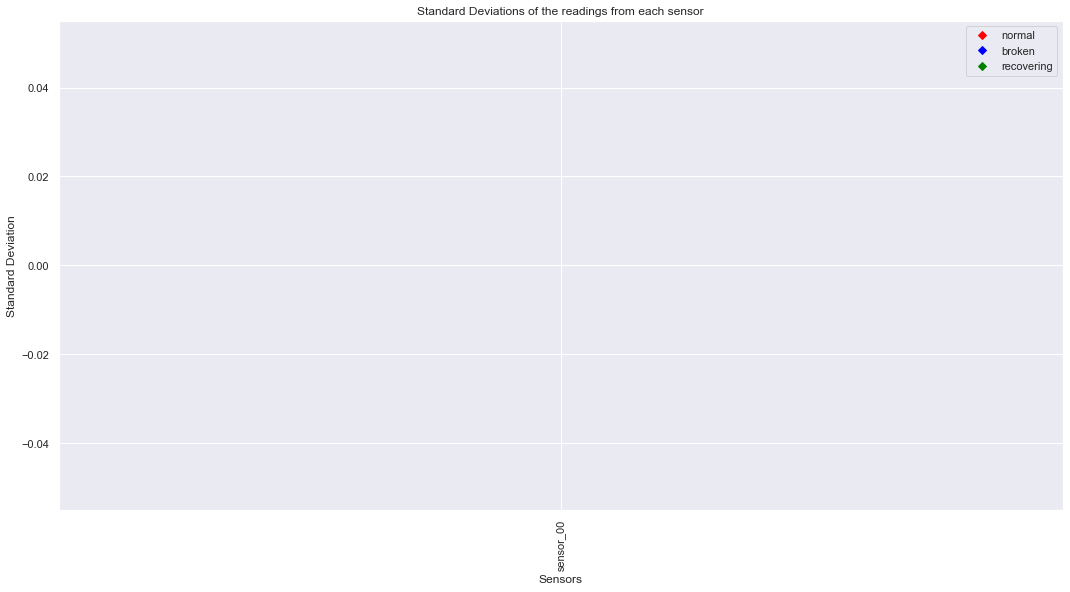

In [60]:
# Plot Standard Deviations of the sensor readings for each state of the pump
sns.set()
_ = plt.figure(figsize=(18,9))
_ = plt.plot(std_normal, color='red', marker='D', label='normal', linestyle='none')
_ = plt.plot(std_broken, color='blue', marker='D', label='broken', linestyle='none')
_ = plt.plot(std_recovering, color='green', marker='D', label='recovering', linestyle='none')
_ = plt.xlabel('Sensors')
_ = plt.ylabel('Standard Deviation')
_ = plt.title('Standard Deviations of the readings from each sensor')
_ = plt.legend(loc='upper right')
_ = plt.xticks(rotation=90)
plt.show()

There are red and blue dots that are closer together, I assume that means the pump is broken not because of them.
There are sensors with much lower standard deviation which signifies much stable operations and gets much bigger standard deviation when the pump is broken (notice their corresponding blue dots on the same vertical line, i.e. sensor_04).Strangely, some sensors have higher standard deviation when the pump is functioning normally and then gets much lower standard deviation when the pump is broken (i.e. sensor_36)

__Means__: Below I plot the means of the readings for each state of the pump and see how different the means are from one condition to another i.e. normal vs broken state.

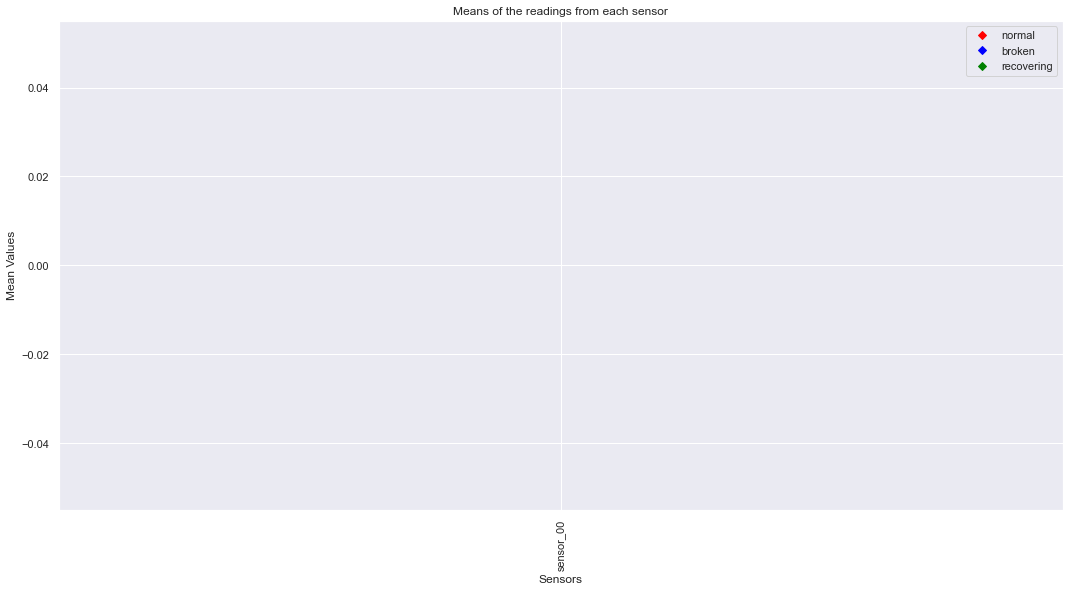

In [61]:
# Plot Mean values of the sensor readings for each state of the pump
sns.set()
_ = plt.figure(figsize=(18,9))
_ = plt.plot(means_normal, marker='D', color='red', label='normal', linestyle='none')
_ = plt.plot(means_broken, marker='D', color='blue', label='broken', linestyle='none')
_ = plt.plot(means_recovering, marker='D', color='green', label='recovering', linestyle='none')
_ = plt.xlabel('Sensors')
_ = plt.ylabel('Mean Values')
_ = plt.title('Means of the readings from each sensor')
_ = plt.legend(loc='upper right')
_ = plt.xticks(rotation=90)
plt.show()

In [62]:
# I will transform the data in order to be able to visualize them all together
df_melt = pd.melt(df_scaled, id_vars=['date', 'machine_status'], value_vars=['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51'], var_name='sensor', value_name='sensor_reading')
df_melt.set_index('date', inplace=True)

KeyError: "The following 'id_vars' are not present in the DataFrame: ['date']"

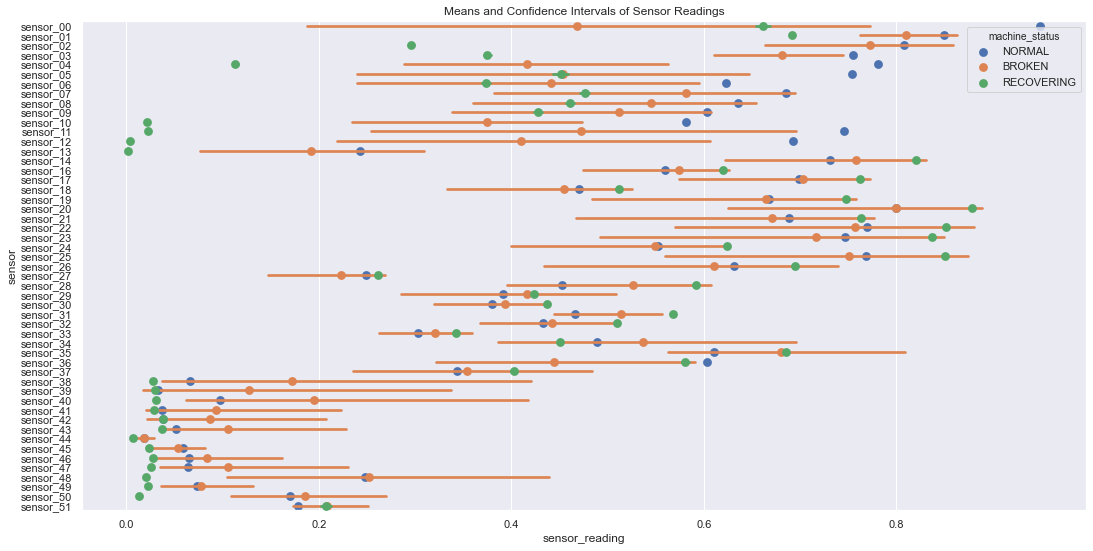

In [25]:
_ = plt.figure(figsize=(18,9))
sns.pointplot(x='sensor_reading', y='sensor', data=df_melt, hue='machine_status', join=False)
_ = plt.title('Means and Confidence Intervals of Sensor Readings')

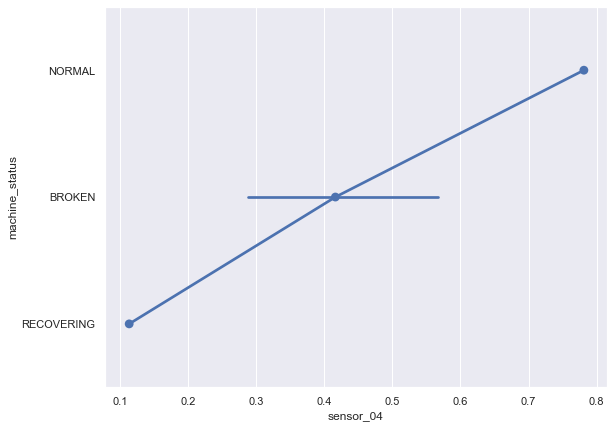

In [27]:
# Now I want to look at the means of this sensor closer by point plot for each state of the pump
sns.set()
_ = plt.figure(figsize=(9,7))
ax = sns.pointplot(x='sensor_04', y='machine_status', data=df_scaled)

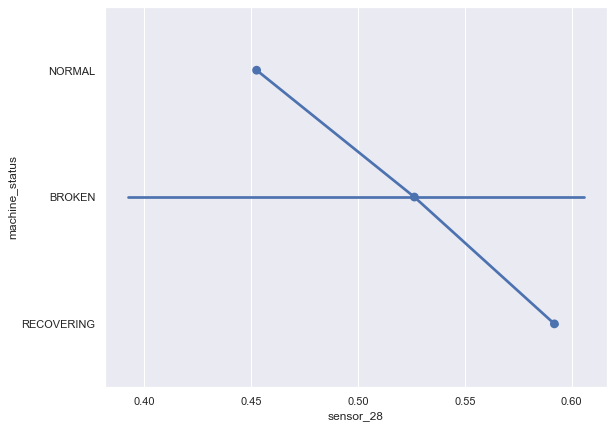

In [28]:
# Now I want to look at the means of this sensor closer by point plot for each state of the pump
sns.set()
_ = plt.figure(figsize=(9,7))
ax = sns.pointplot(x='sensor_28', y='machine_status', data=df_scaled)

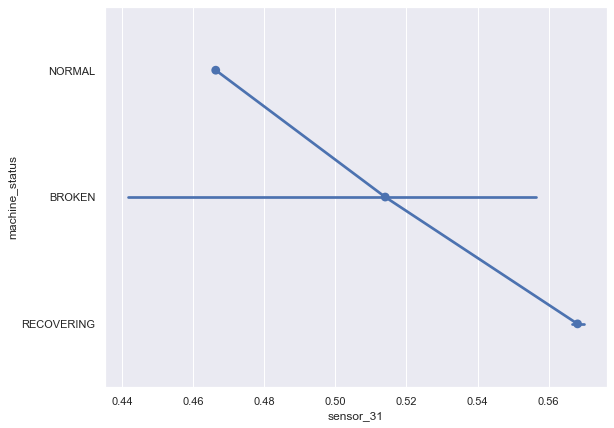

In [29]:
# Now I want to look at the means of this sensor closer by point plot for each state of the pump
sns.set()
_ = plt.figure(figsize=(9,7))
ax = sns.pointplot(x='sensor_31', y='machine_status', data=df_scaled)

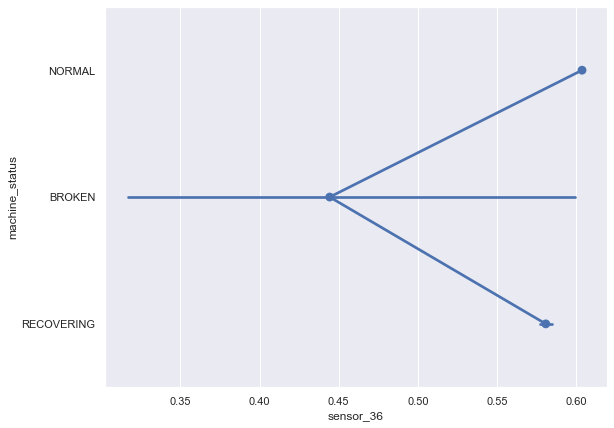

In [30]:
# Now I want to look at the means of this sensor closer by point plot for each state of the pump
sns.set()
_ = plt.figure(figsize=(9,7))
ax = sns.pointplot(x='sensor_36', y='machine_status', data=df_scaled)

As seen from above, the sensors 04, 28, 31 and 36 have the greatest changes in their means when the pump is in normal vs broken state. I will closely investigate this during feature selection before the modeling step of this project.

__Medians__: Below I plot the medians of the readings for each state of the pump and see how different the medians are from one condition to another i.e. normal vs broken state.

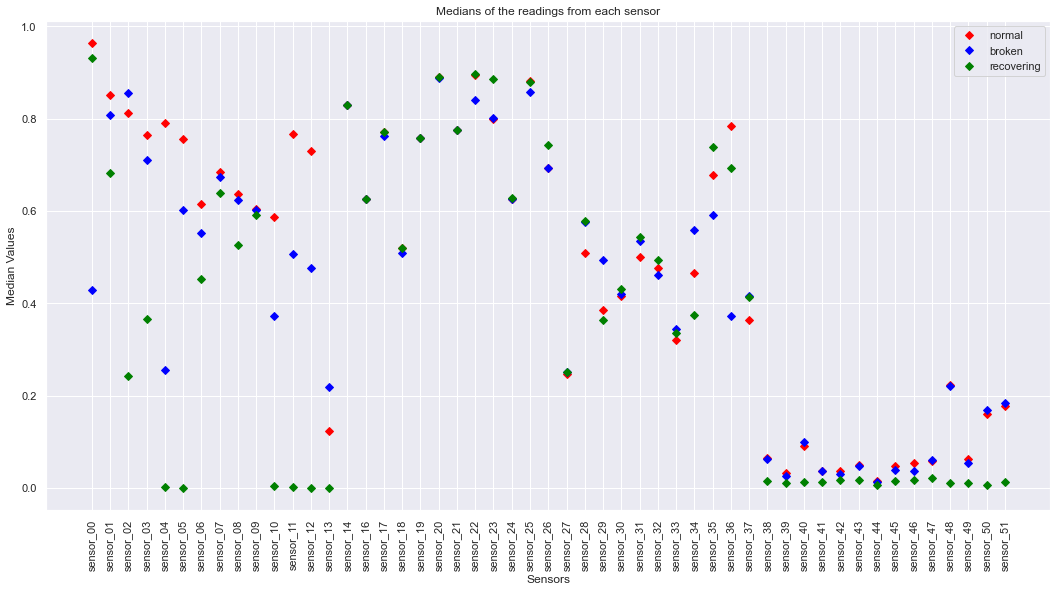

In [31]:
# Plot Median of the sensor readings for each state of the pump
sns.set()
_ = plt.figure(figsize=(18,9))
_ = plt.plot(median_normal, marker='D', color='red', label='normal', linestyle='none')
_ = plt.plot(median_broken, marker='D', color='blue', label='broken', linestyle='none')
_ = plt.plot(median_recovering, marker='D', color='green', label='recovering', linestyle='none')
_ = plt.xlabel('Sensors')
_ = plt.ylabel('Median Values')
_ = plt.title('Medians of the readings from each sensor')
_ = plt.legend(loc='upper right')
_ = plt.xticks(rotation=90)
plt.show()

I notice similar trend from the readings of the sensors 04, 28, 31 and 36 from the above plot as well.

__Ranges__: Below I plot the ranges of the readings for each state of the pump and see how different the ranges are from one condition to another i.e. normal vs broken state.

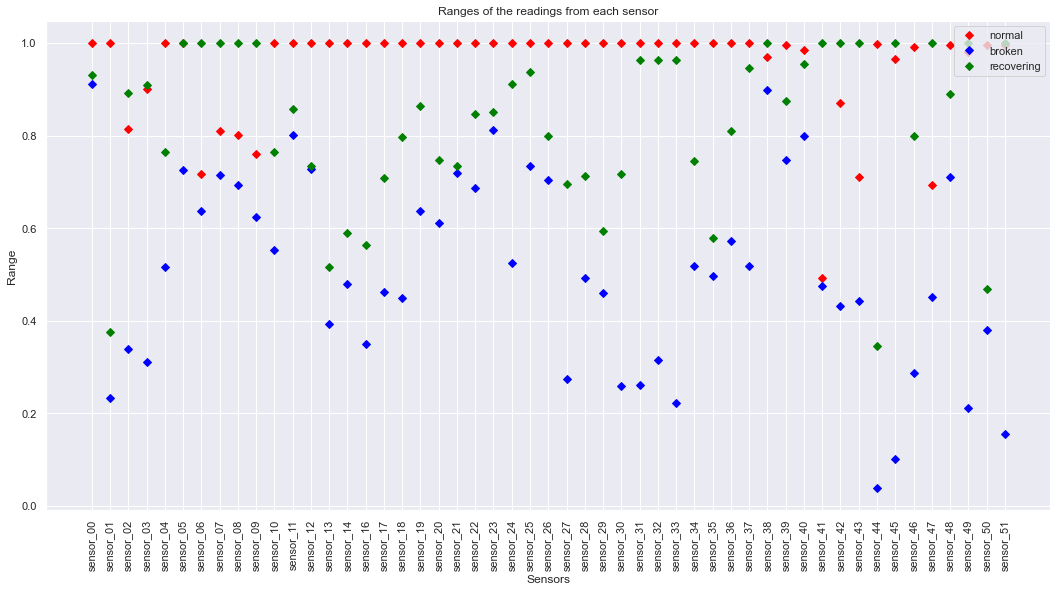

In [32]:
# Plot Range (max value - min value) of the sensor readings for each state of the pump
sns.set()
_ = plt.figure(figsize=(18,9))
_ = plt.plot(range_normal, marker='D', color='red', label='normal', linestyle='none')
_ = plt.plot(range_broken, marker='D', color='blue', label='broken', linestyle='none')
_ = plt.plot(range_recovering, marker='D', color='green', label='recovering', linestyle='none')
_ = plt.xlabel('Sensors')
_ = plt.ylabel('Range')
_ = plt.title('Ranges of the readings from each sensor')
_ = plt.legend(loc='upper right')
_ = plt.xticks(rotation=90)
plt.show()

The above plot that shows the ranges (max-min) for each of the sensors for each state of the pump and it definitely shows big difference in other sensors that just the four sensors mentioned in other plots above. For the sensors which have red and blue dots closer together, I assume that they don't impact the operational state of the pump. In other words, the pump will not be broken because of them. 

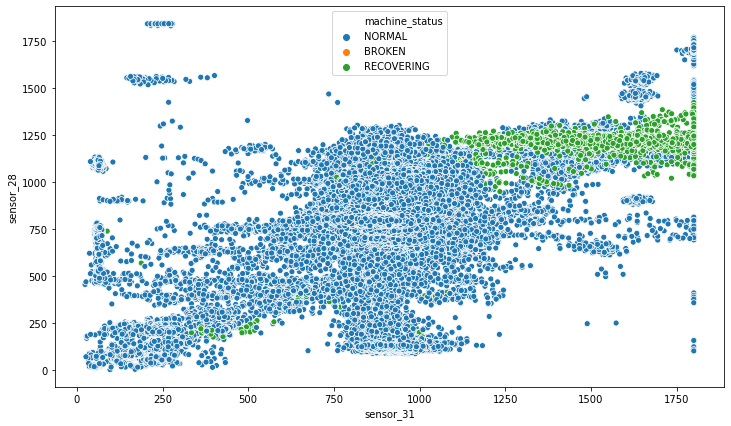

In [10]:
plt.figure(figsize=(12,7))
ax = sns.scatterplot(x="sensor_31", y="sensor_28", hue="machine_status", data=df)

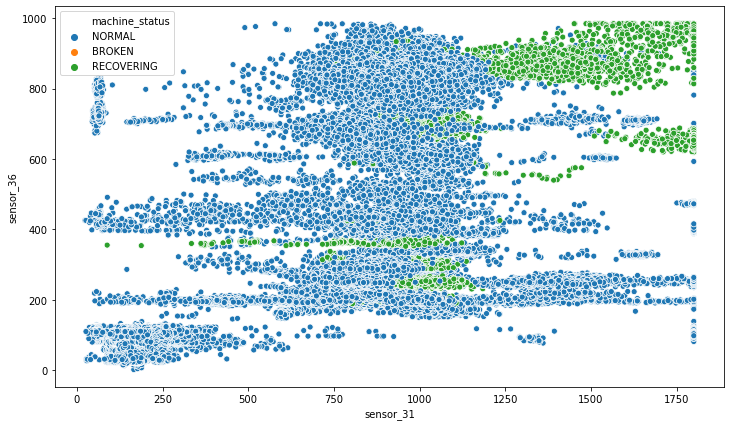

In [11]:
plt.figure(figsize=(12,7))
ax = sns.scatterplot(x="sensor_31", y="sensor_36", hue="machine_status", data=df)

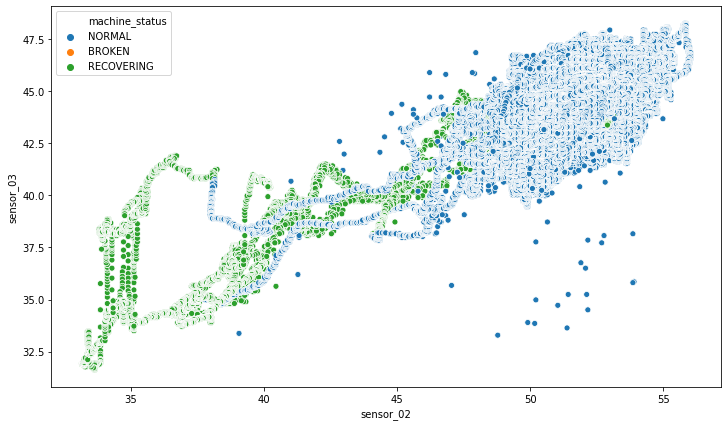

In [13]:
plt.figure(figsize=(12,7))
ax = sns.scatterplot(x="sensor_02", y="sensor_03", hue="machine_status", data=df)

__Histograms__: Now let's take a look at the histograms for sensor readings for each state of the pump

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_00


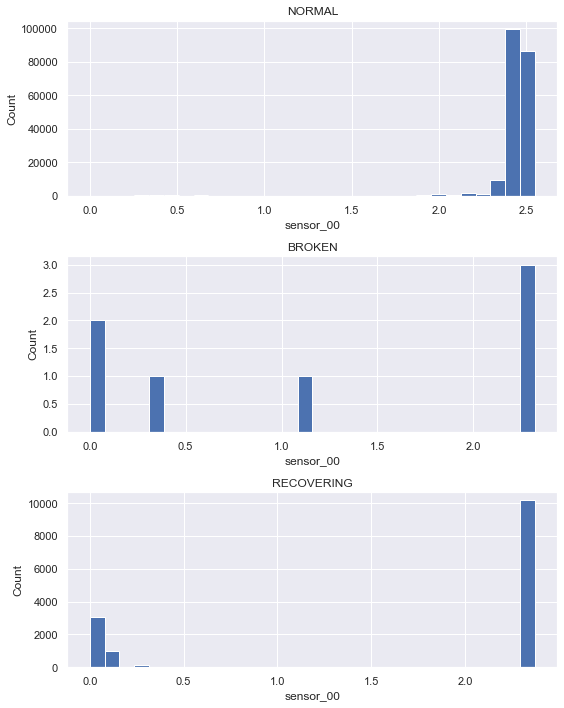

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_01


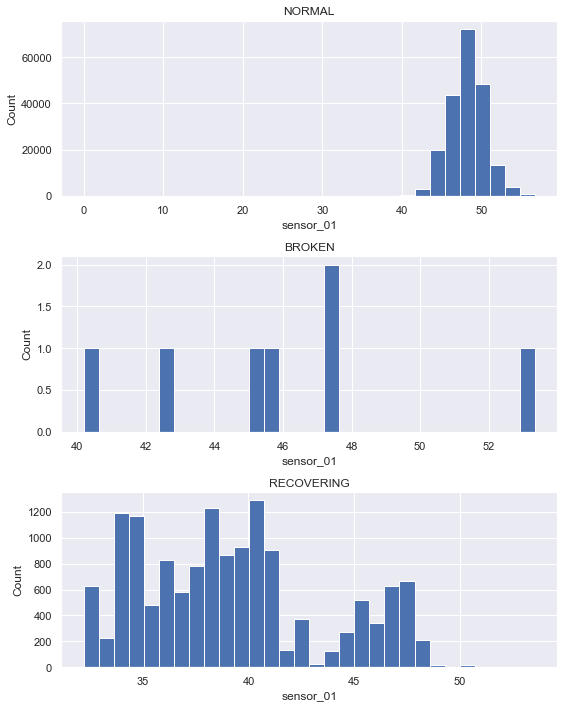

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_02


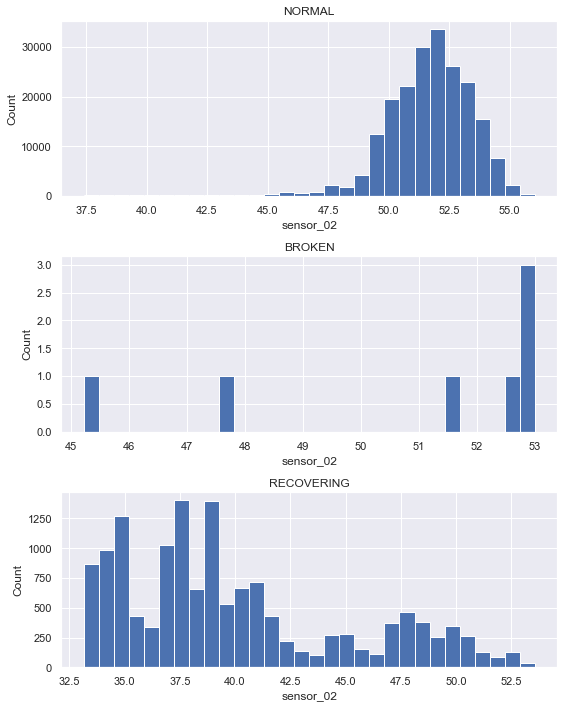

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_03


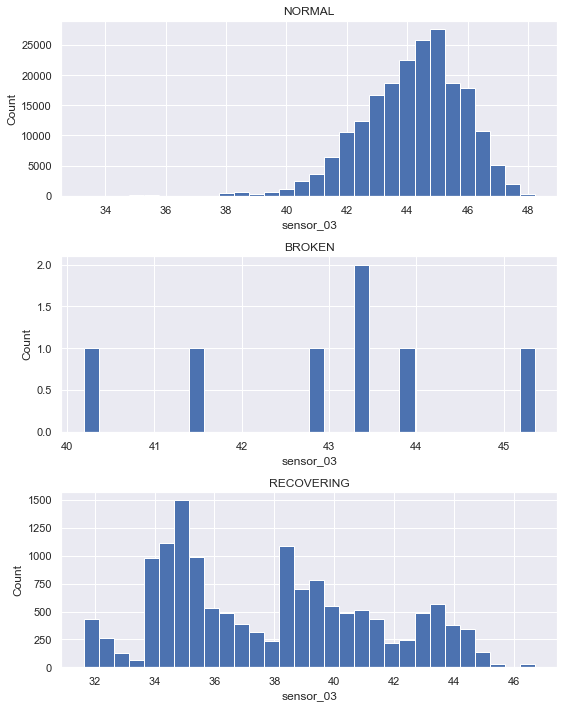

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_04


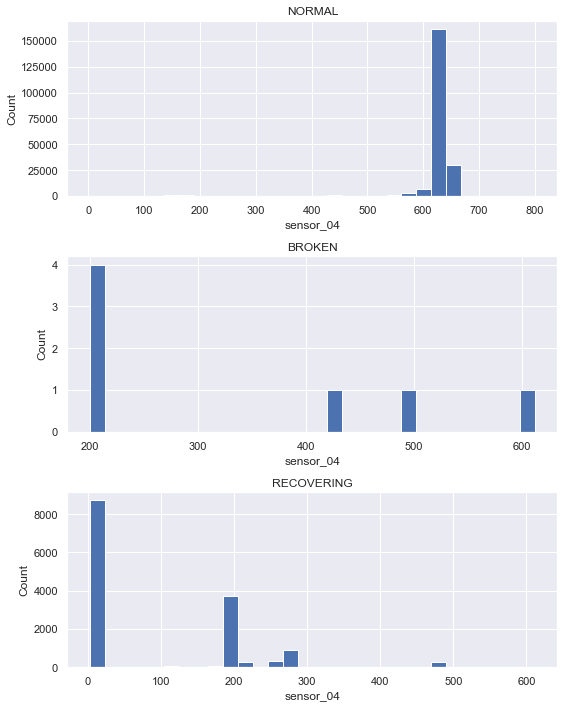

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_05


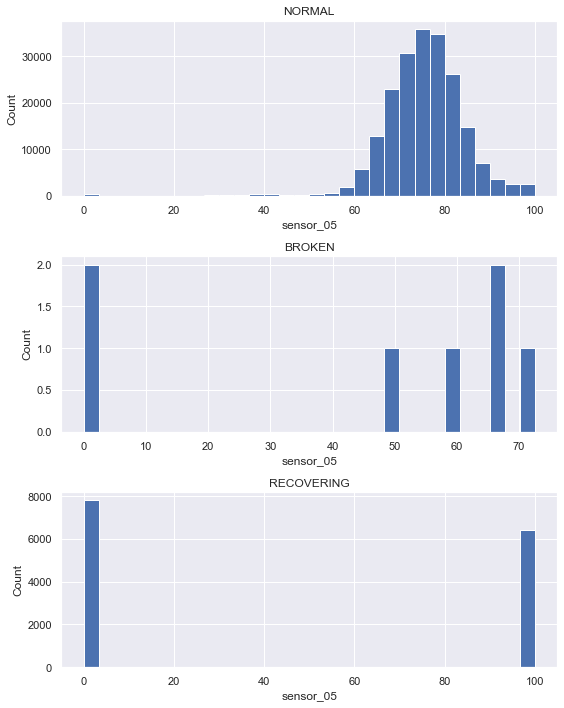

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_06


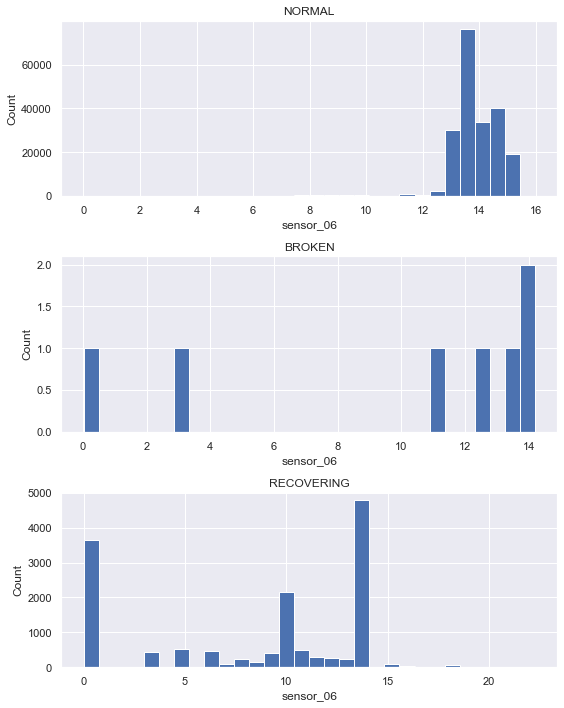

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_07


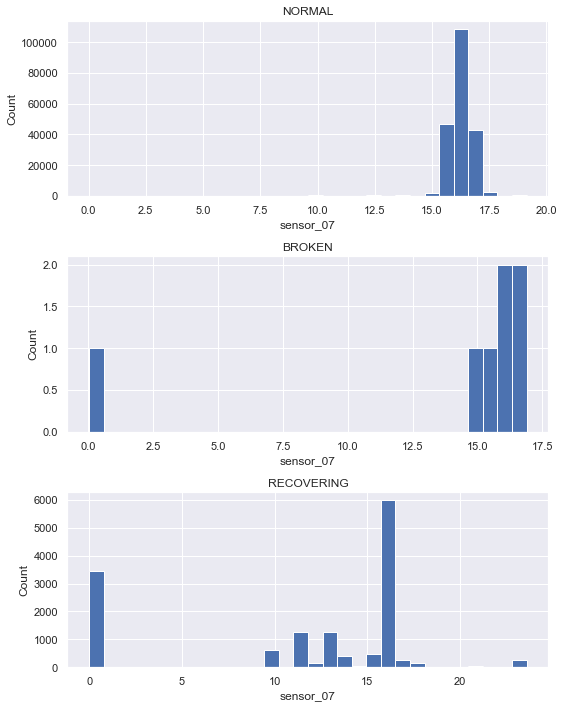

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_08


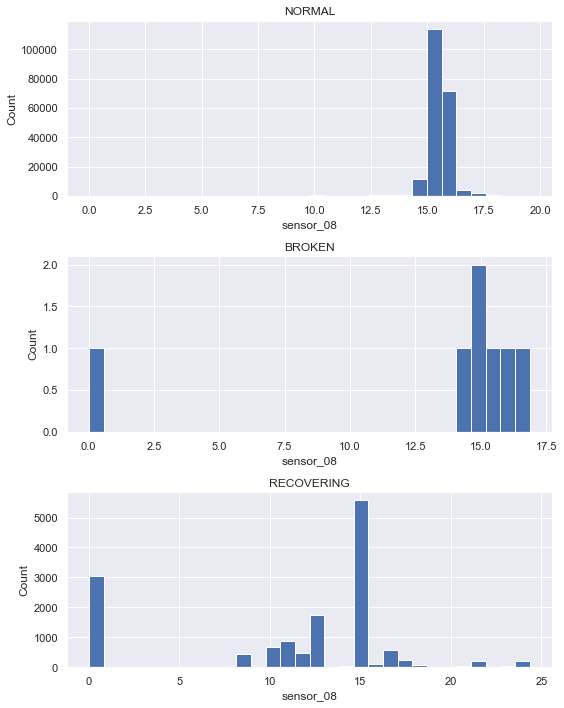

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_09


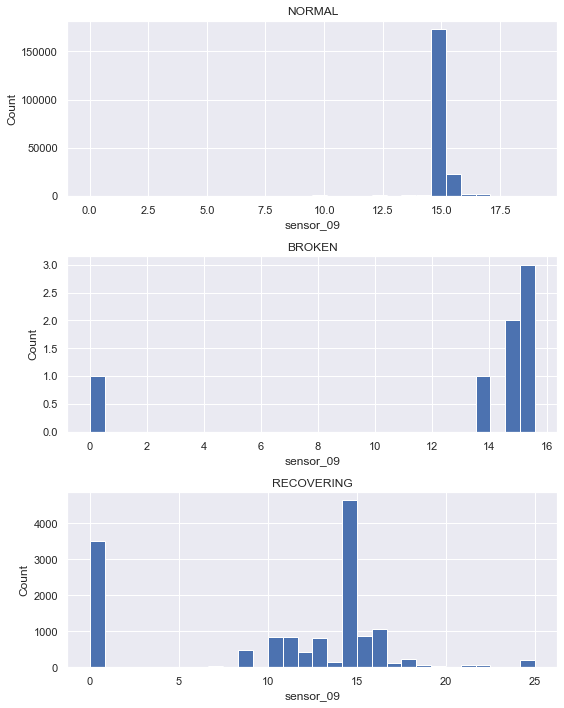

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_10


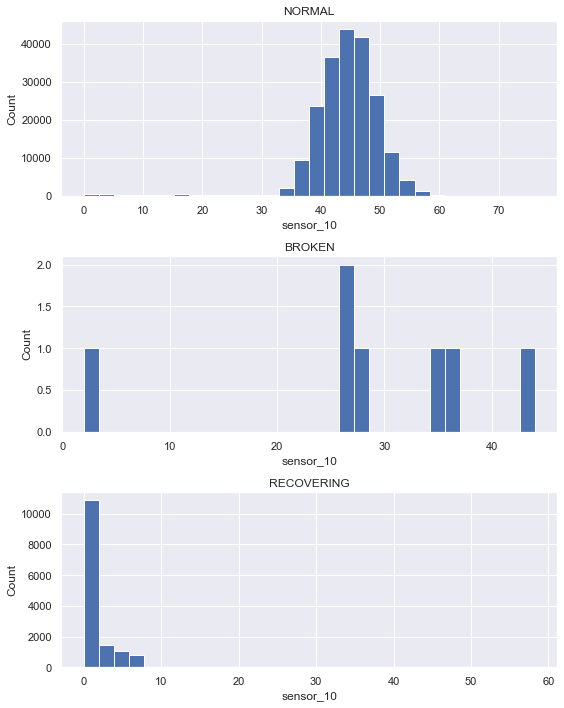

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_11


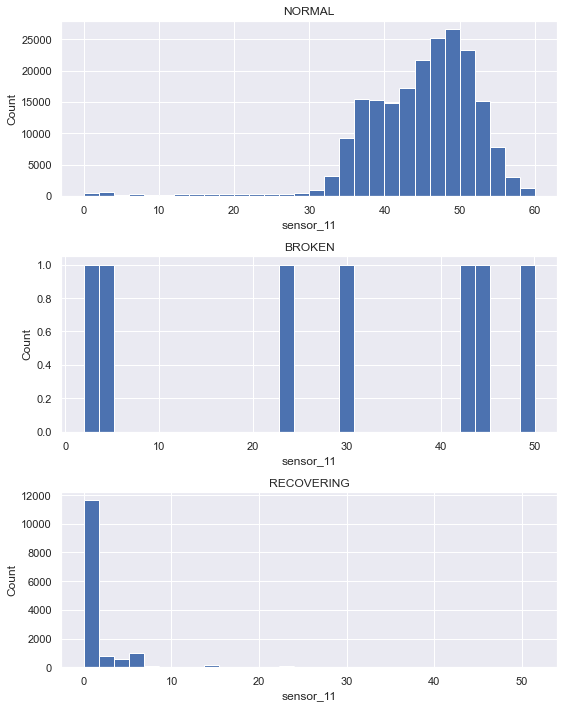

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_12


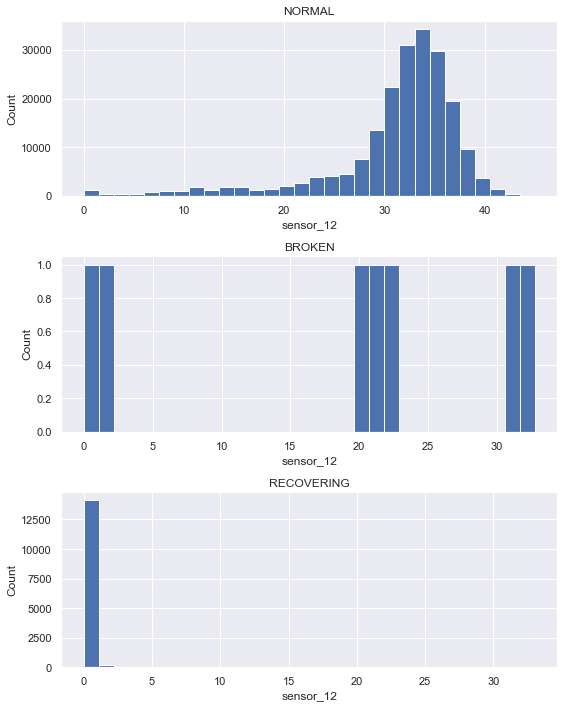

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_13


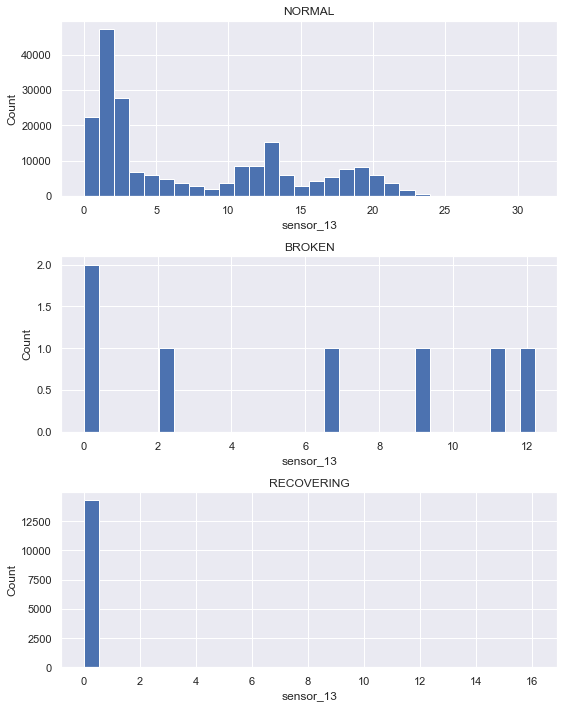

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_14


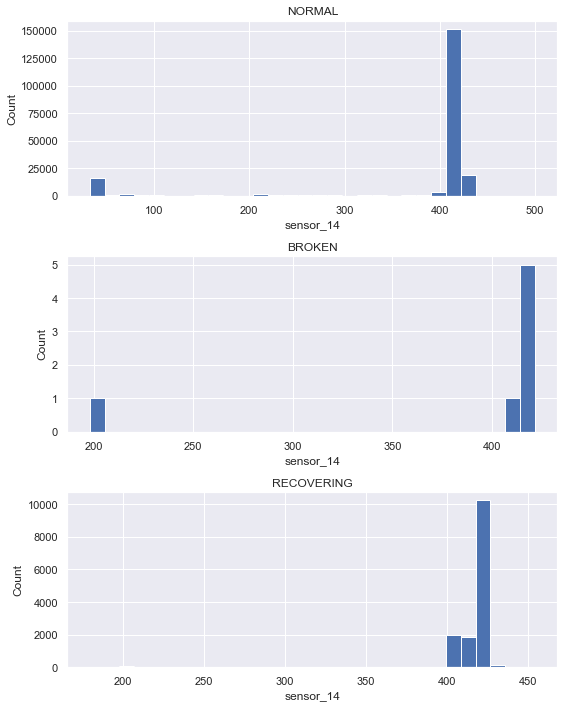

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_16


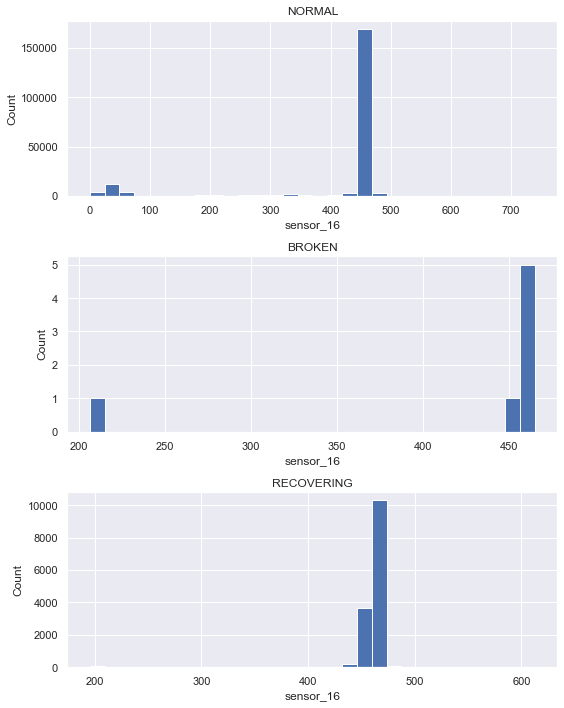

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_17


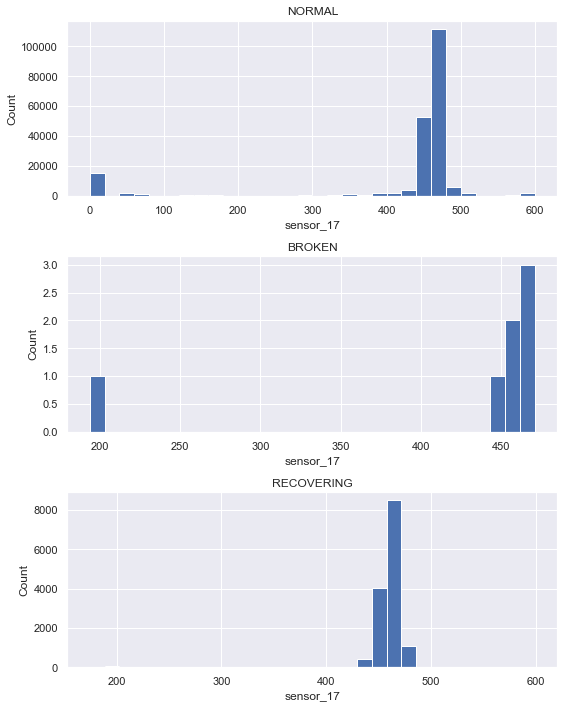

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_18


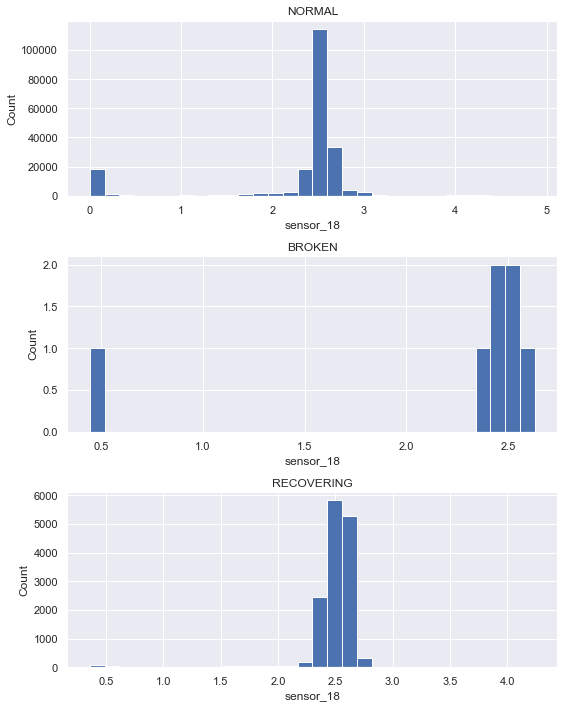

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_19


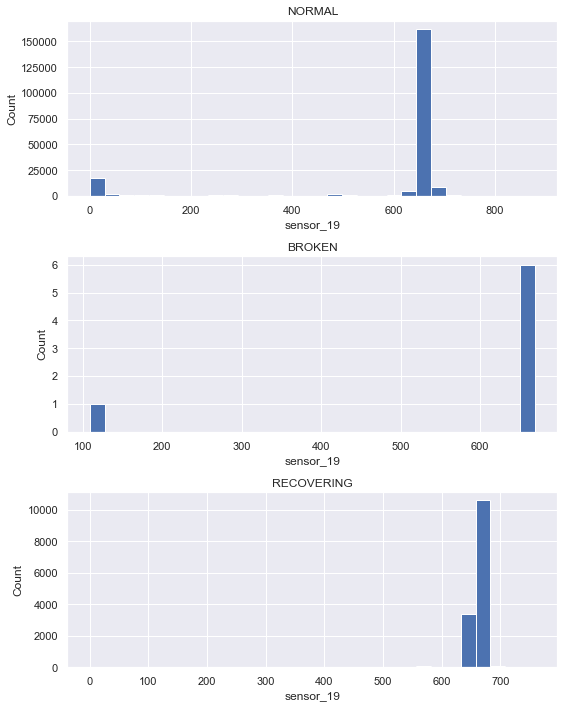

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_20


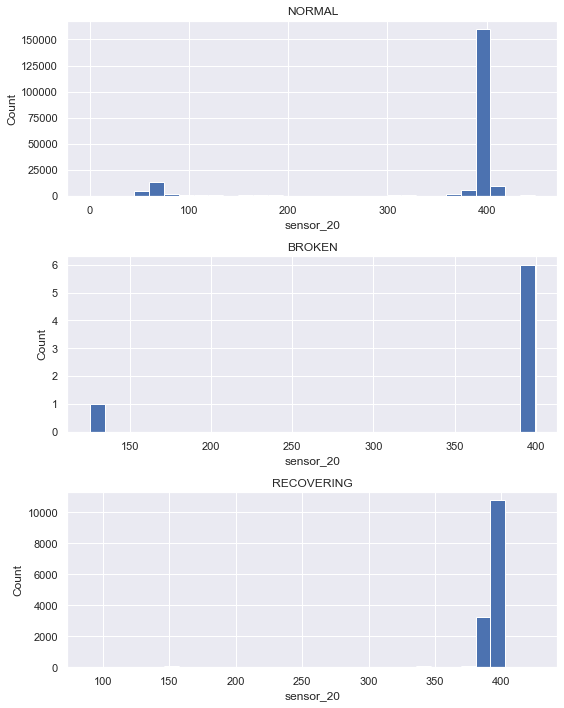

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_21


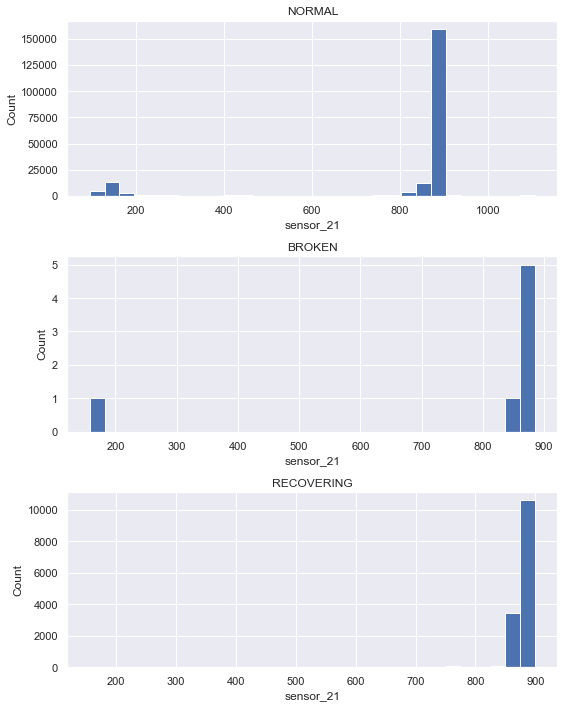

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_22


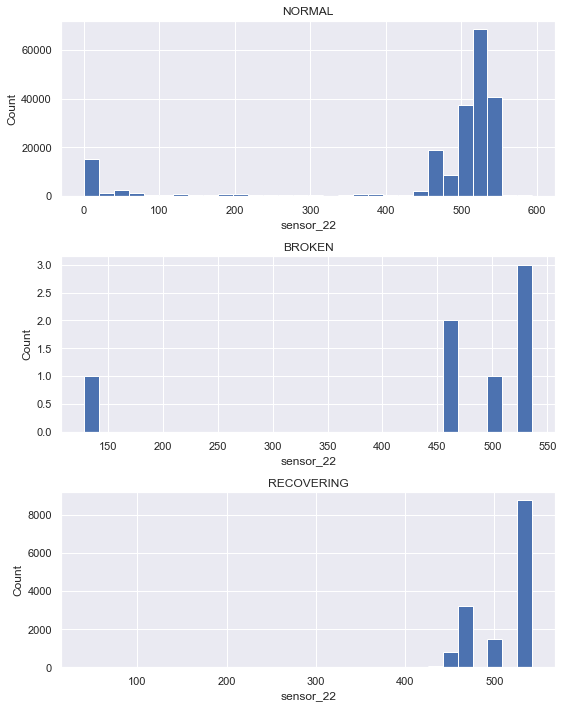

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_23


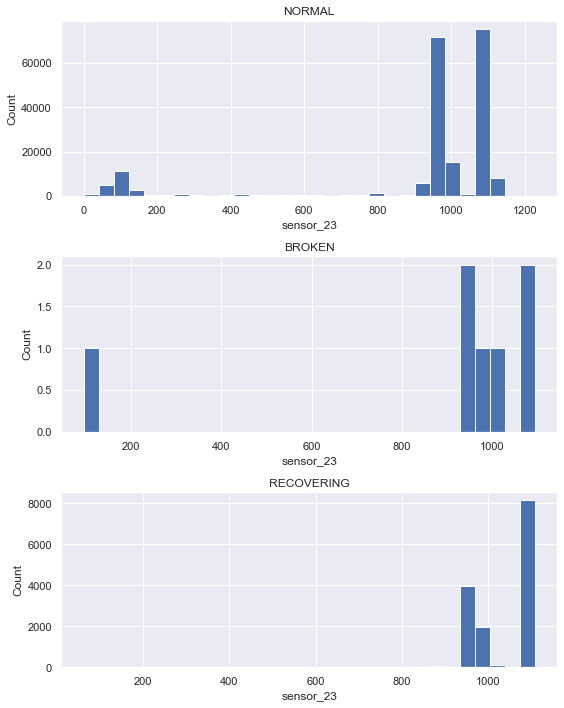

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_24


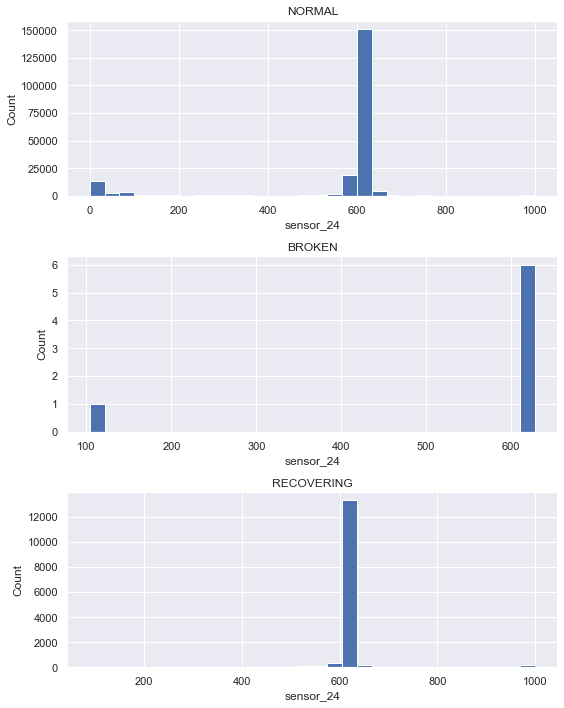

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_25


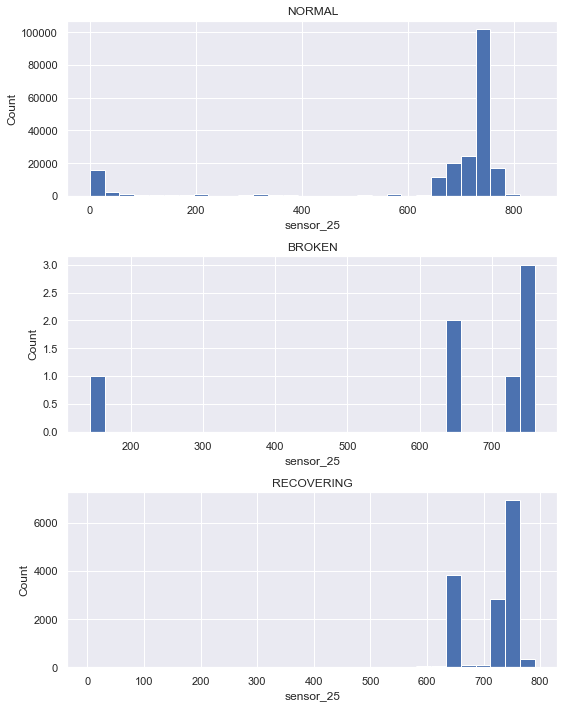

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_26


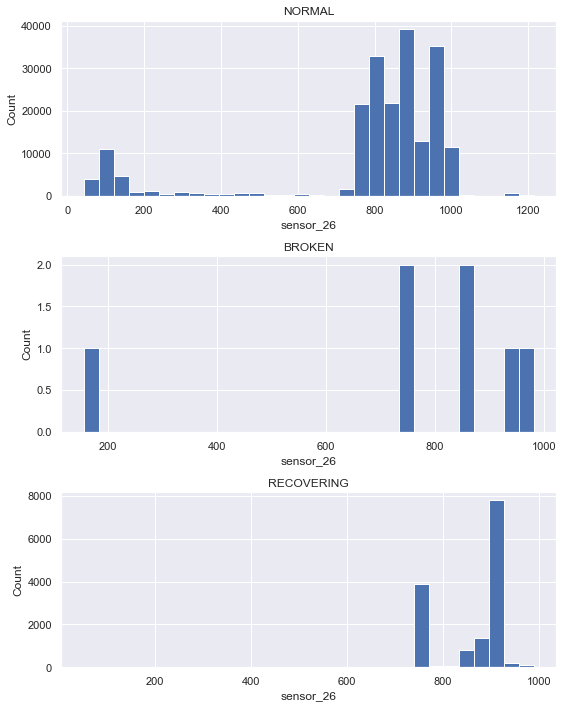

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_27


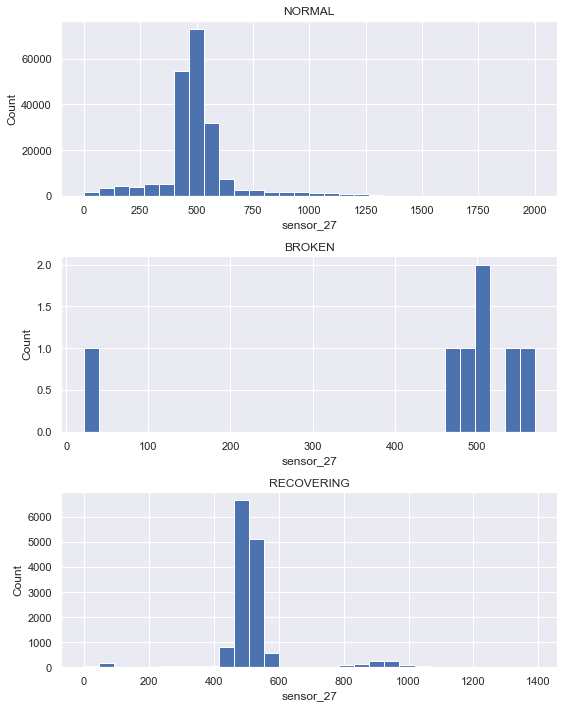

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_28


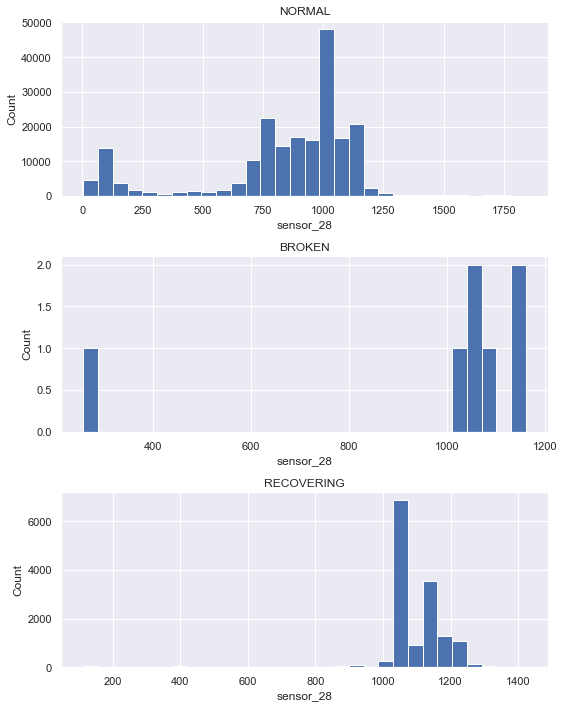

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_29


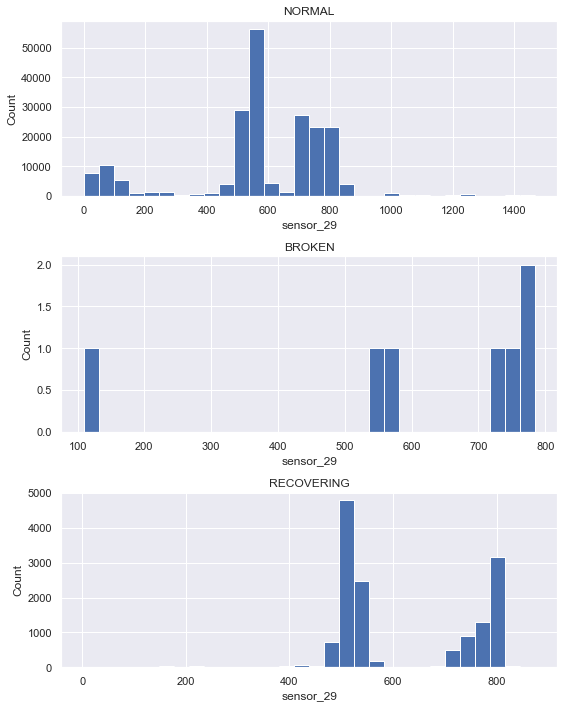

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_30


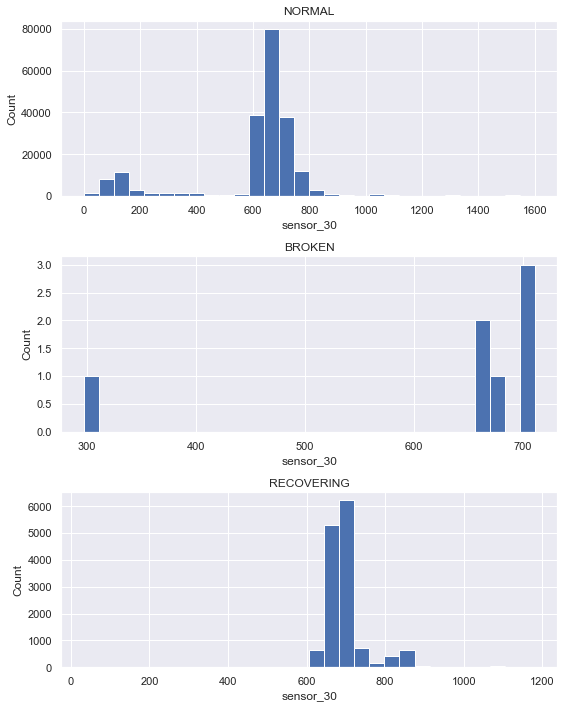

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_31


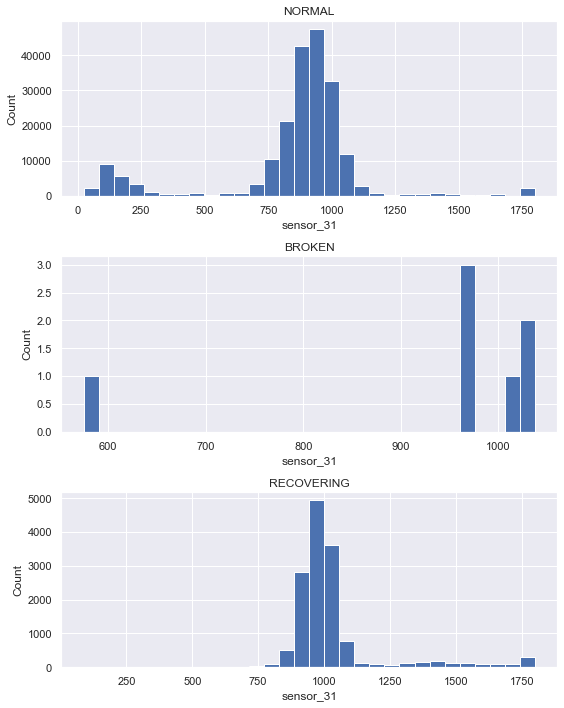

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_32


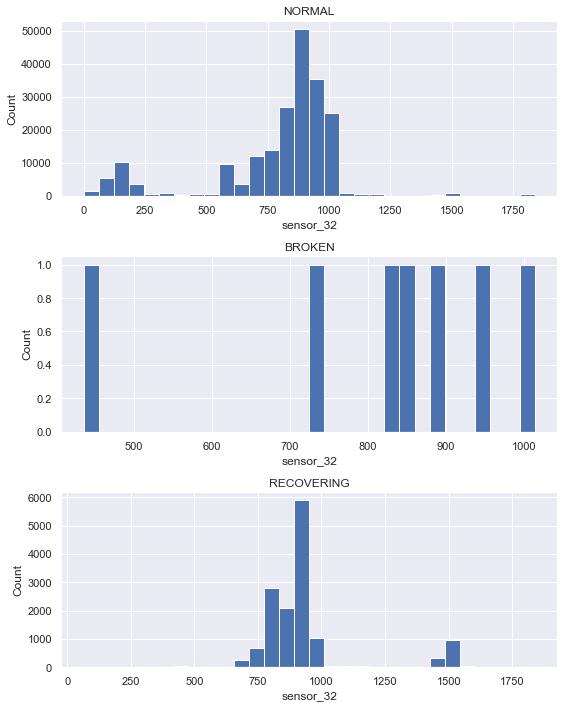

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_33


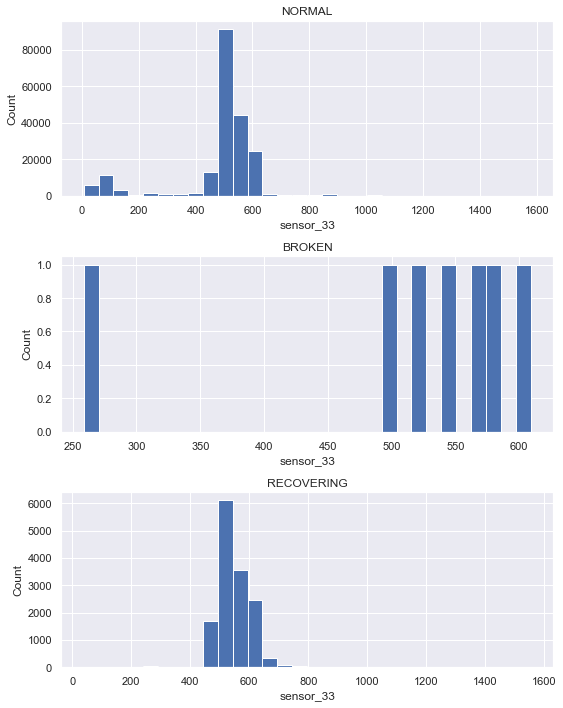

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_34


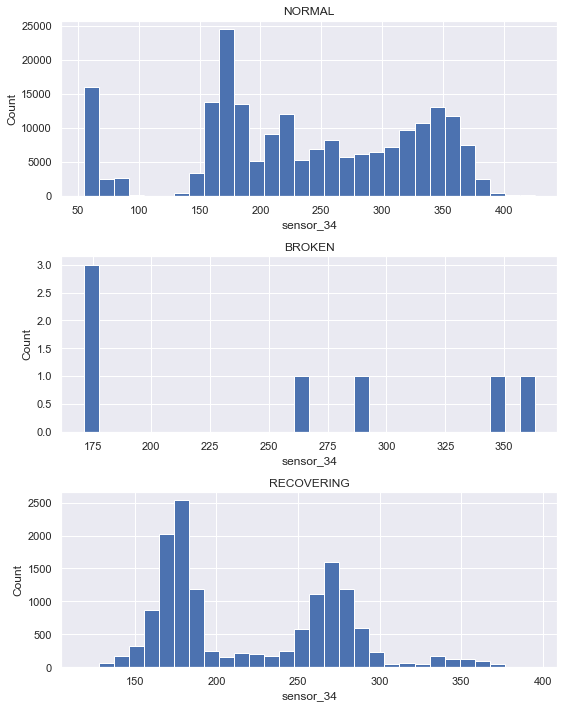

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_35


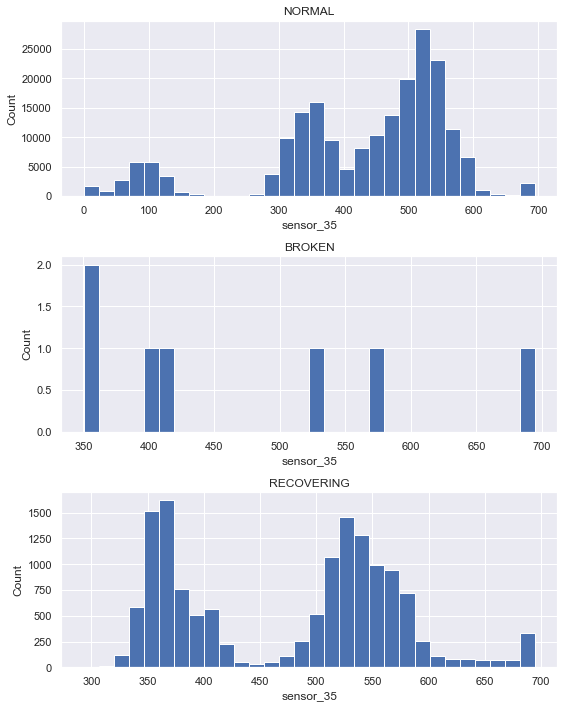

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_36


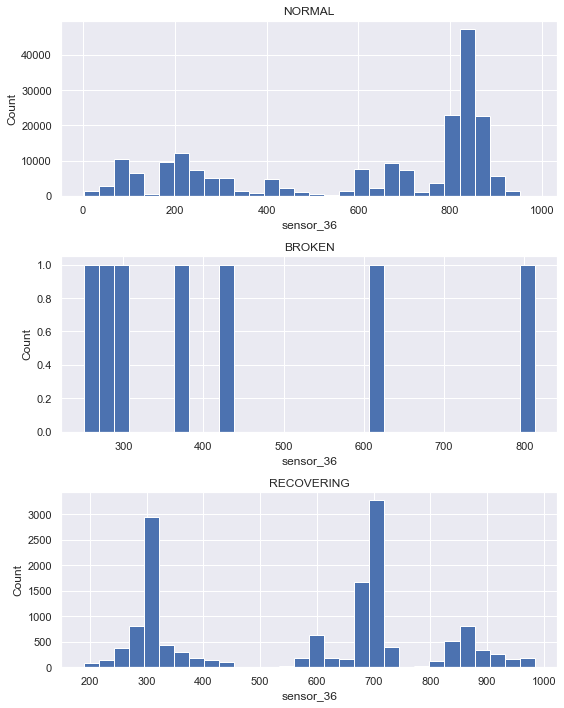

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_37


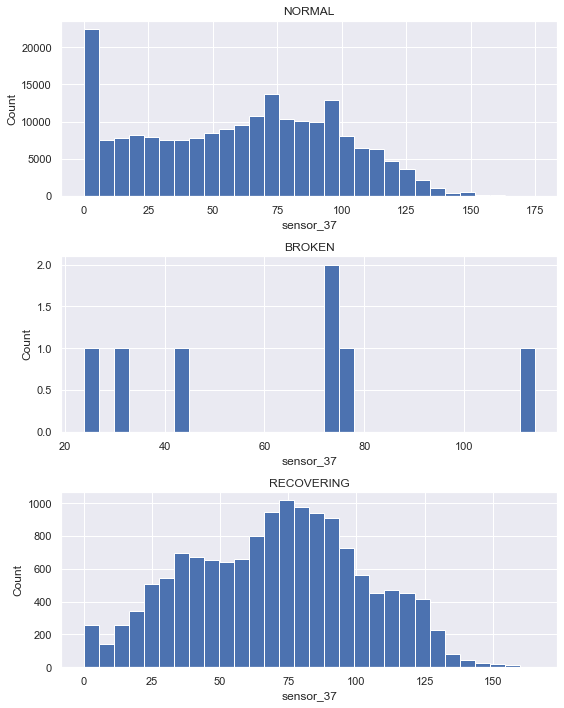

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_38


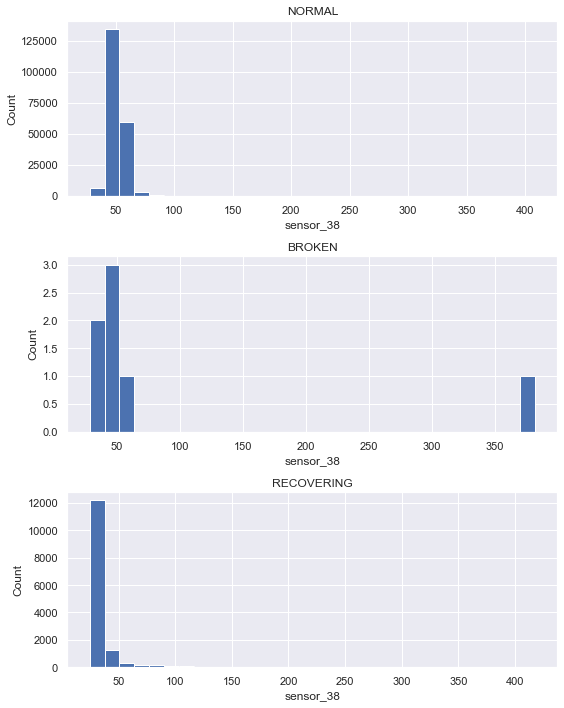

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_39


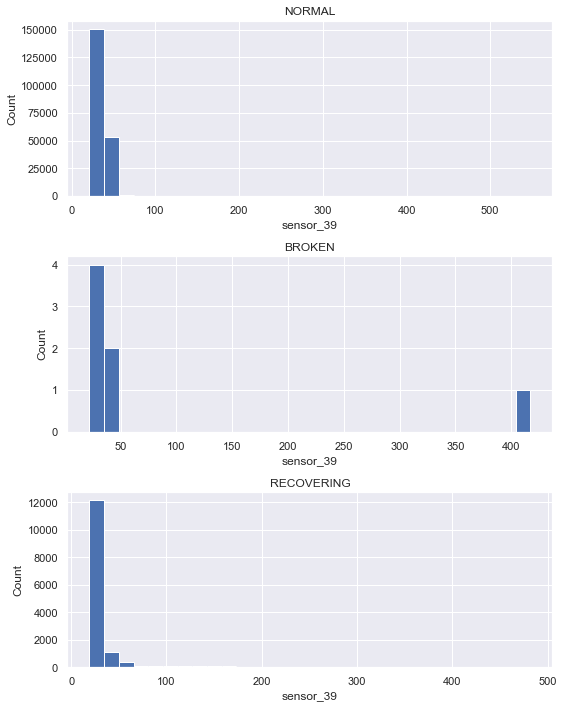

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_40


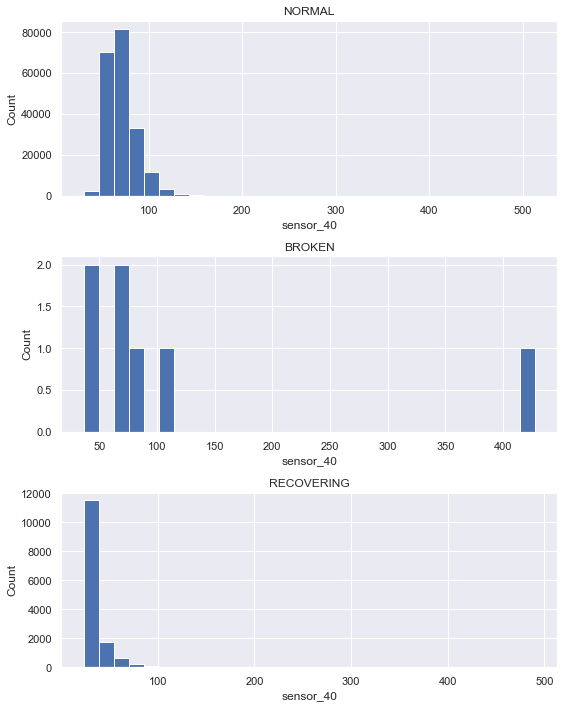

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_41


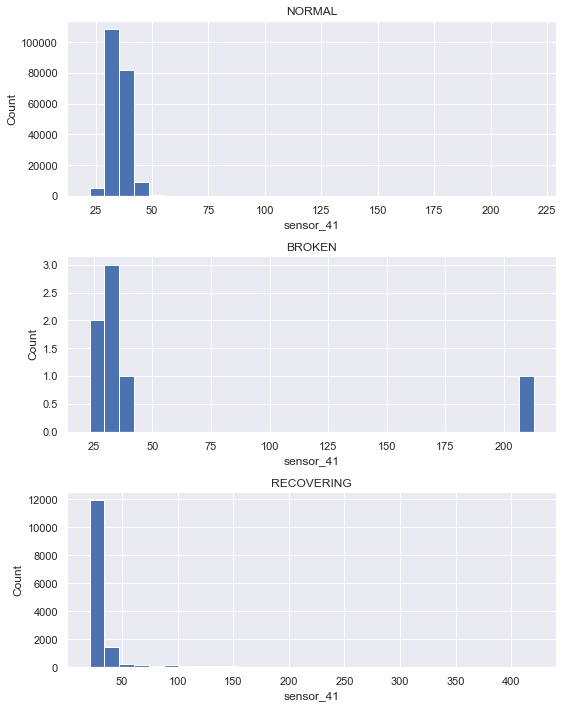

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_42


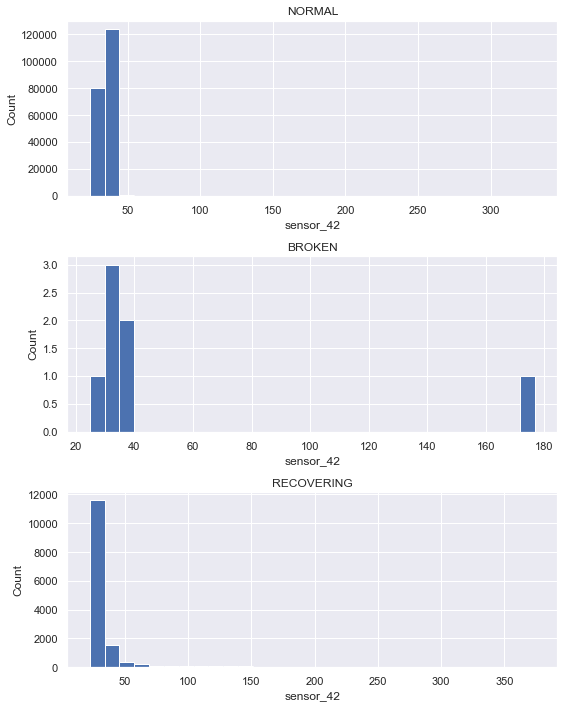

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_43


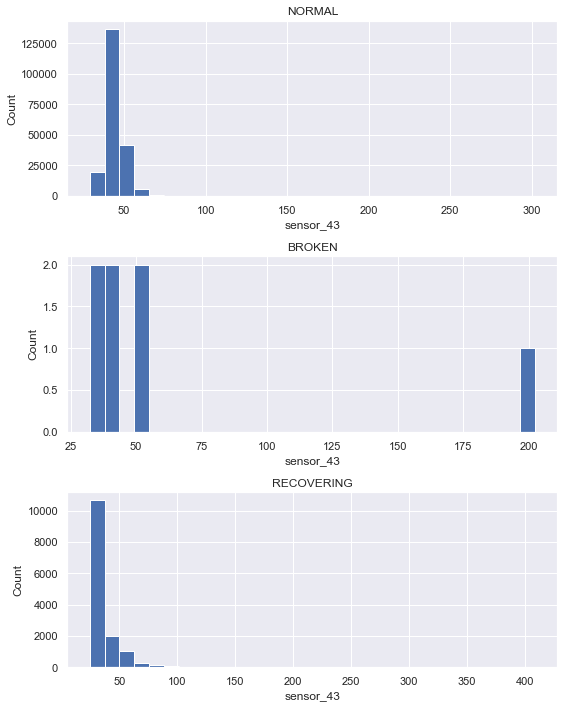

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_44


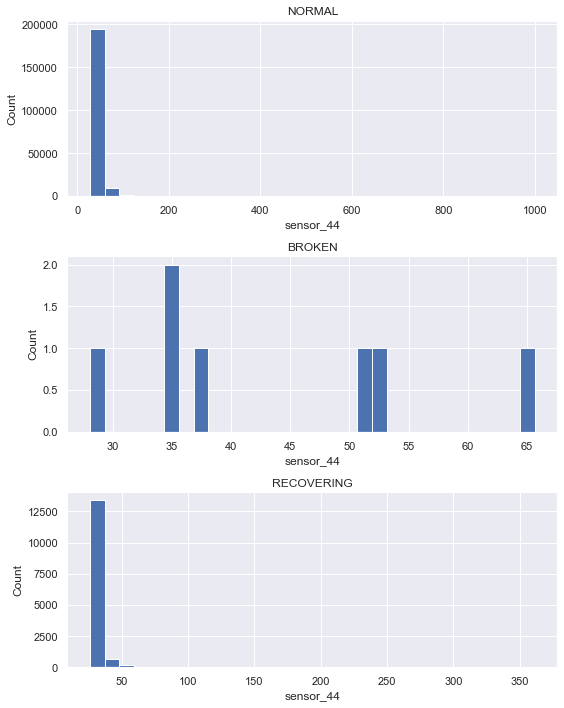

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_45


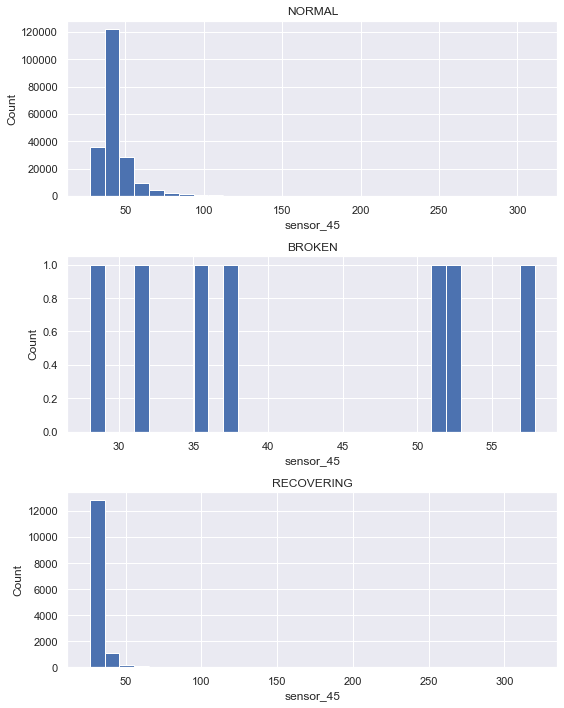

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_46


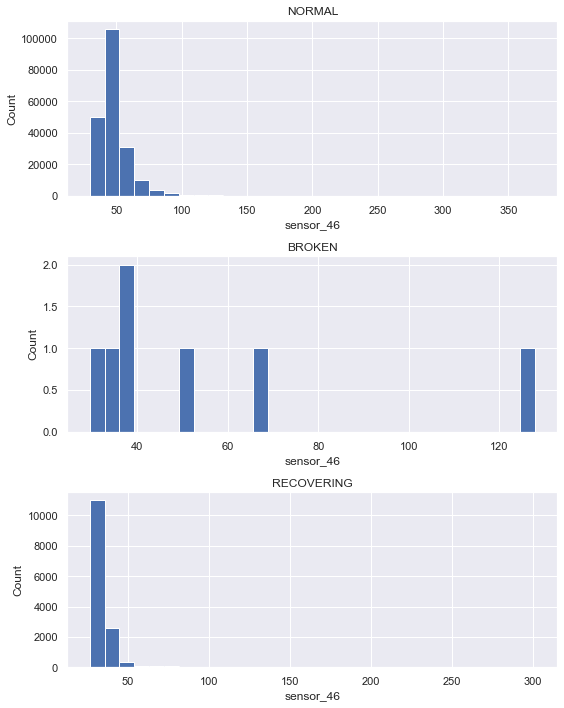

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_47


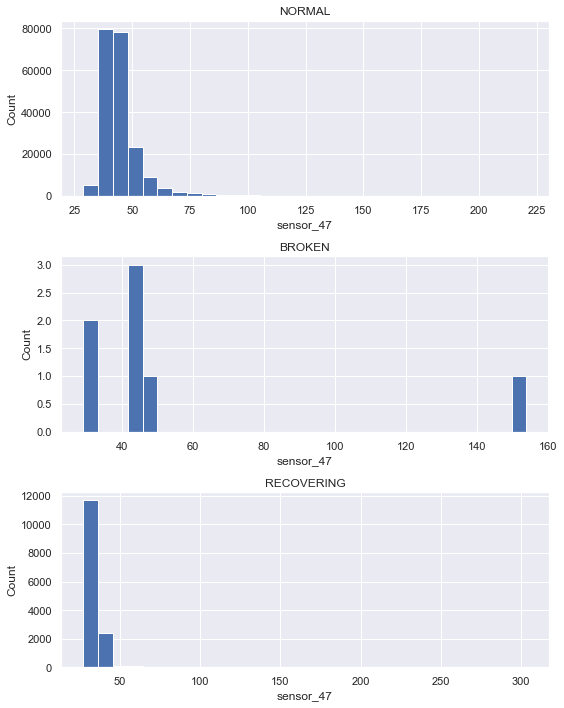

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_48


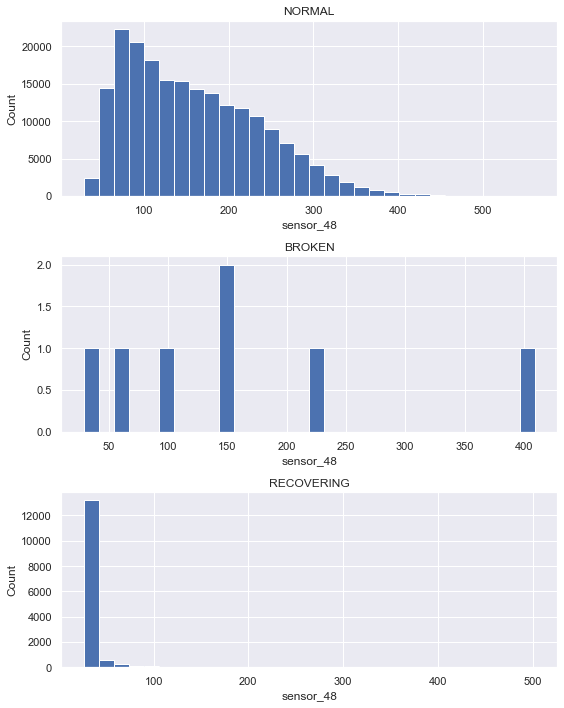

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_49


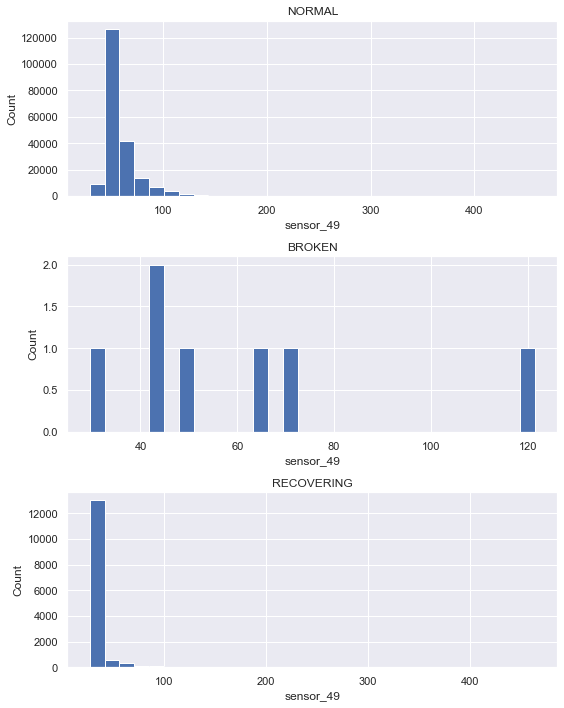

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_50


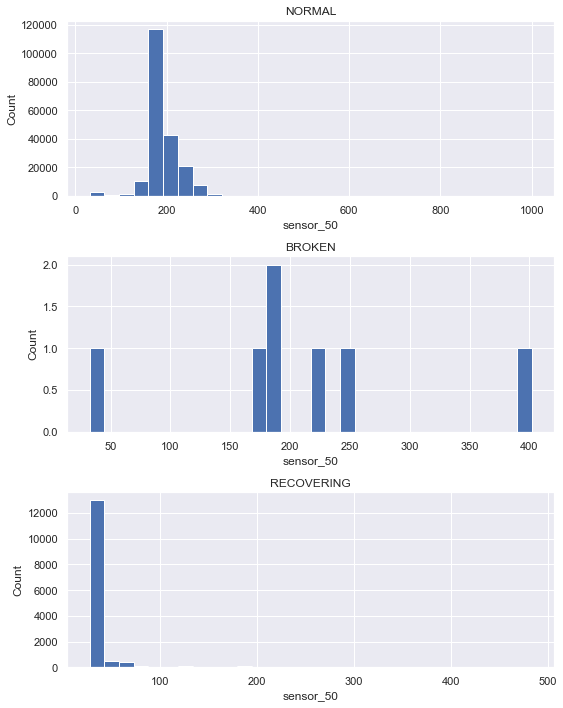

Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor:  sensor_51


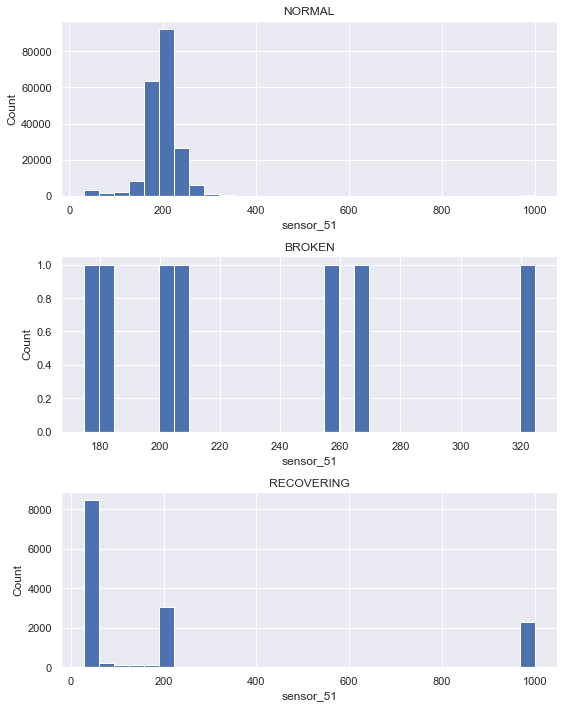

In [87]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
for i, col in enumerate(df_adj.columns):
    print(color.BOLD + "Histogram of readings for NORMAL, BROKEN and RECOVERING states from the sensor: " + color.END, col)
    sns.set()
    plt.figure(figsize=(8,10)) 
    plt.subplot(3,1, 1)
    plt.hist(normal[col], bins=30)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('NORMAL')
    plt.subplot(3,1, 2)
    sns.set()
    plt.hist(broken[col], bins=30)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('BROKEN')
    plt.subplot(3,1, 3)
    sns.set()
    plt.hist(recovering[col], bins=30)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('RECOVERING')
    plt.tight_layout()
    plt.show()

__ECDF plots__: Let's plot and see ECDF of the sensor readings for each state of the pump

In [34]:
# Compute ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

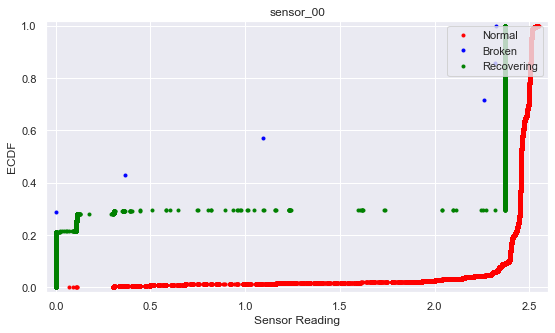

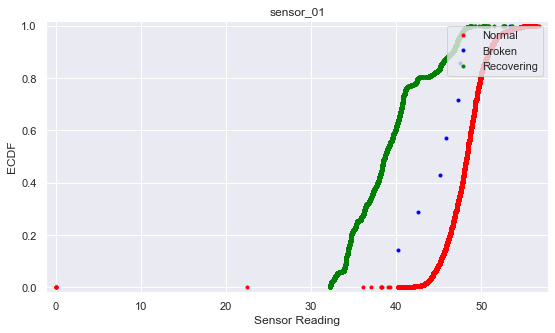

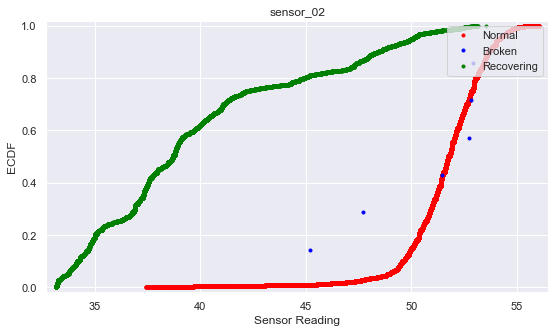

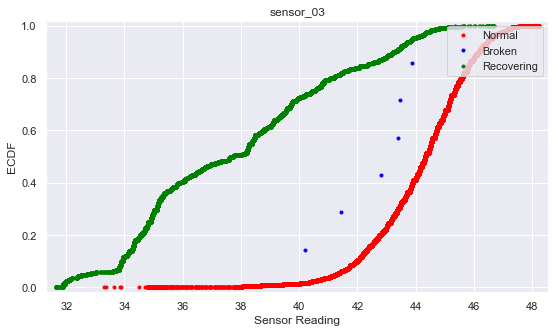

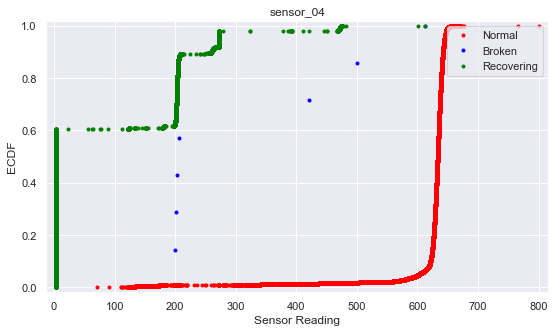

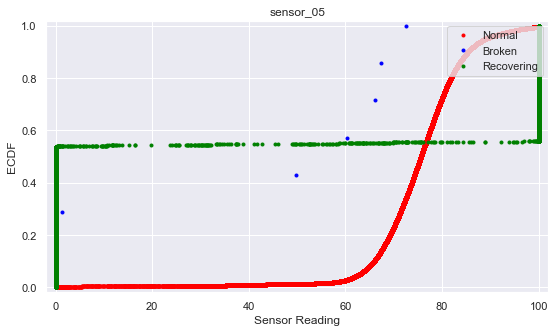

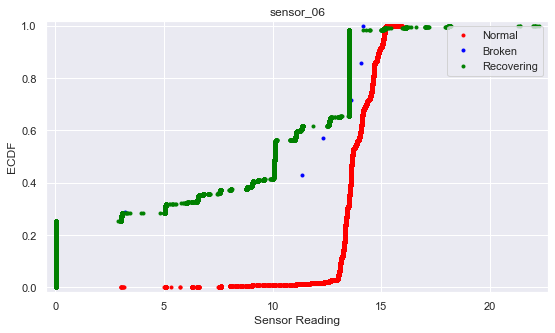

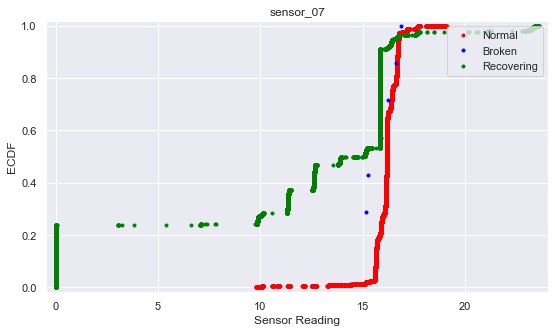

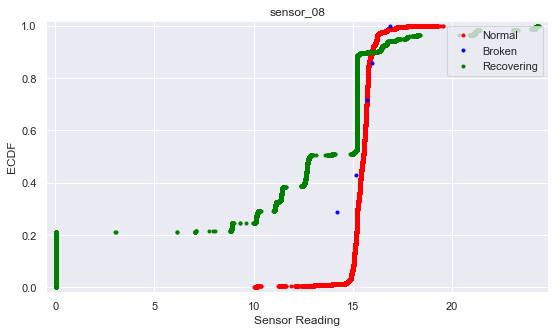

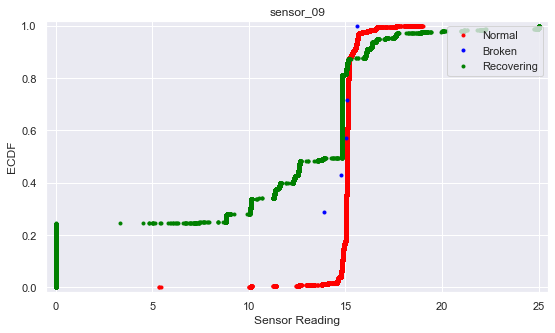

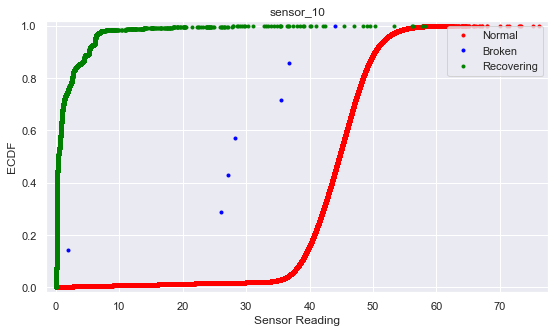

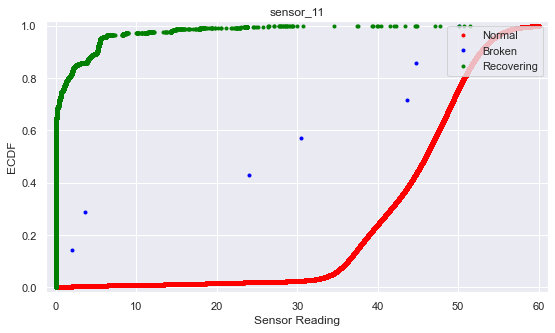

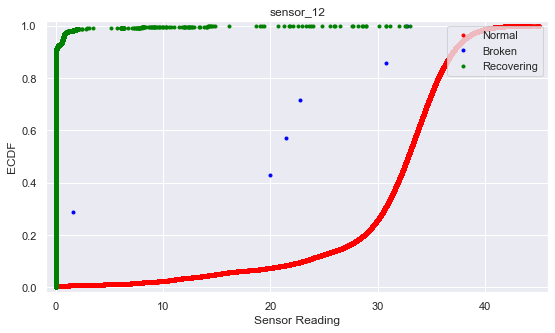

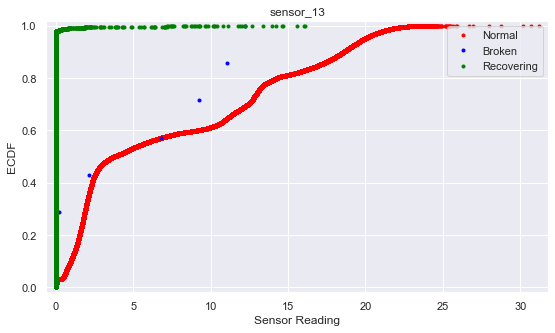

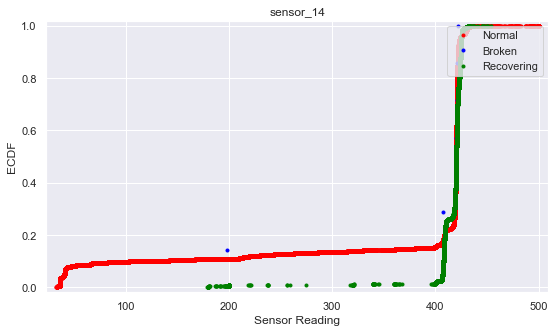

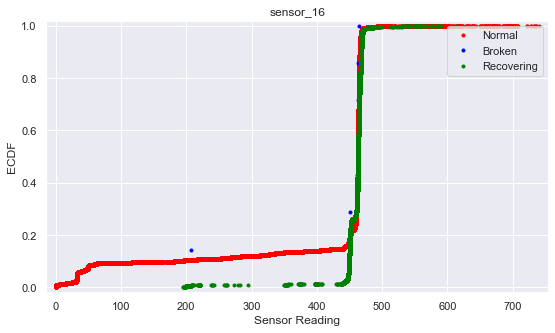

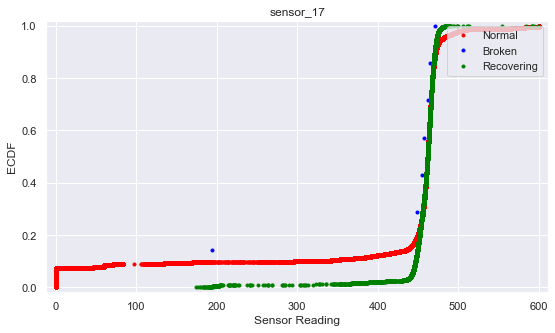

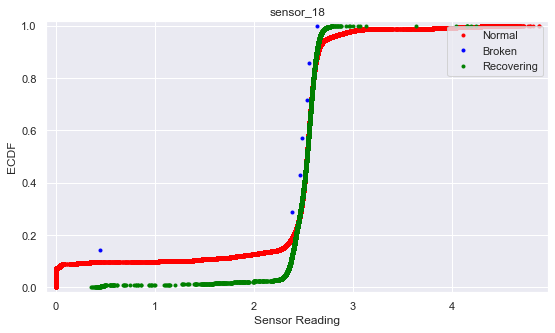

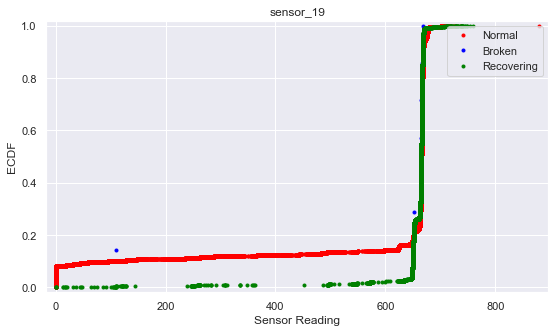

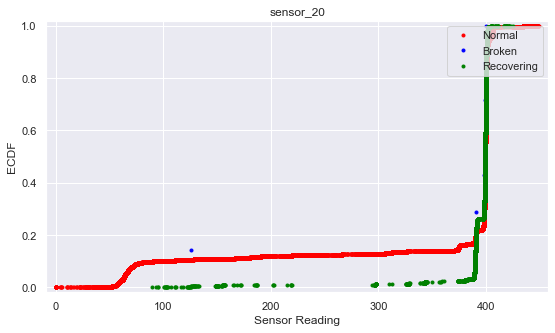

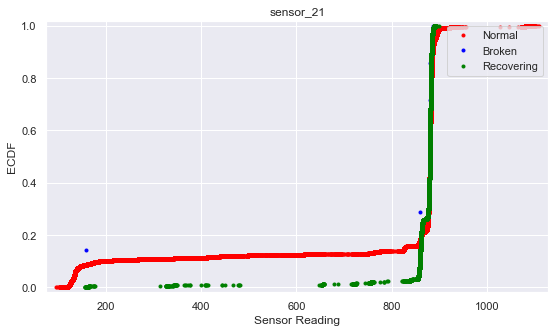

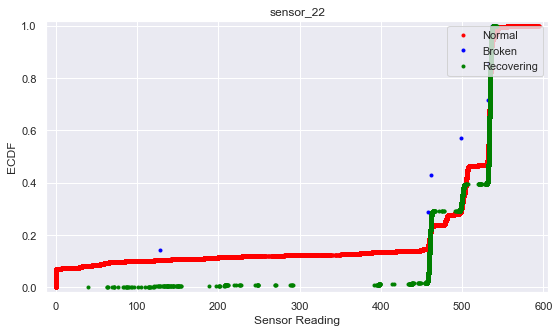

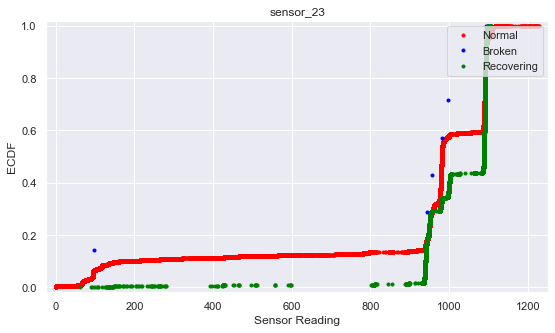

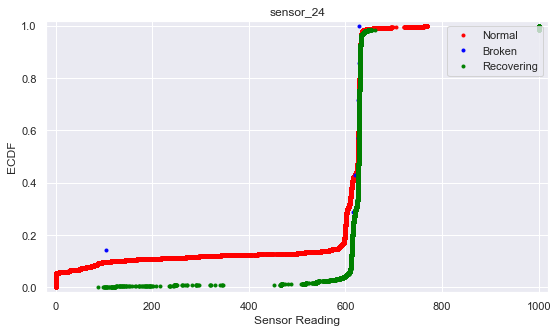

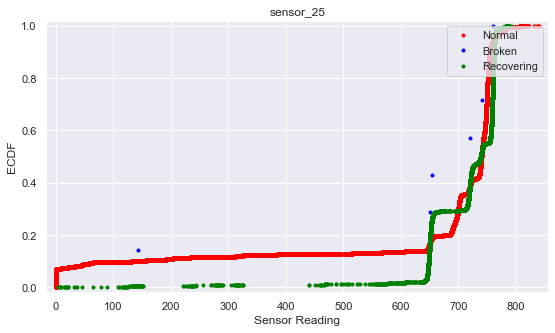

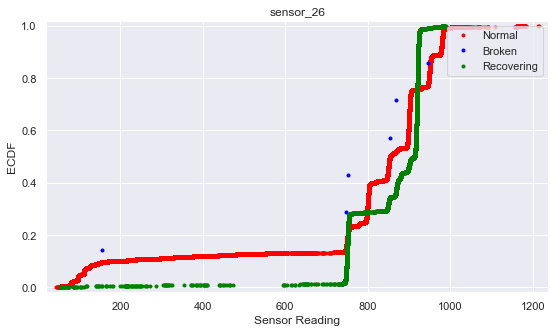

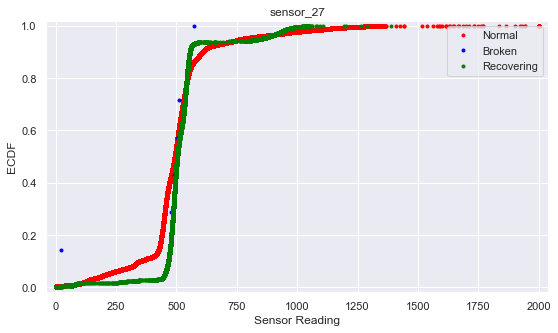

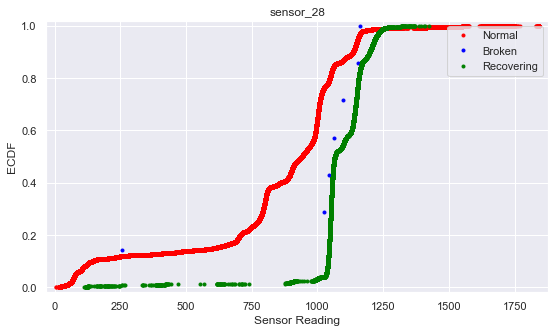

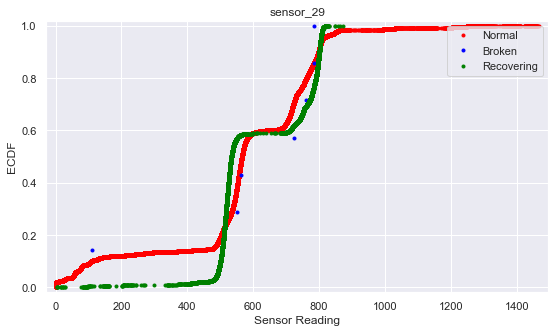

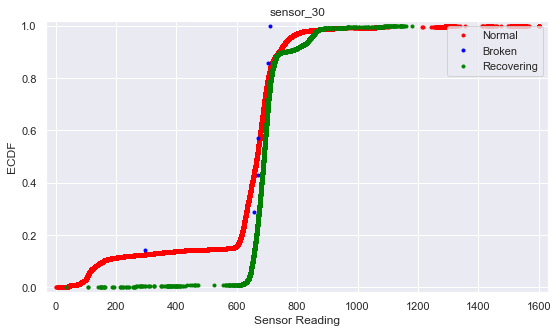

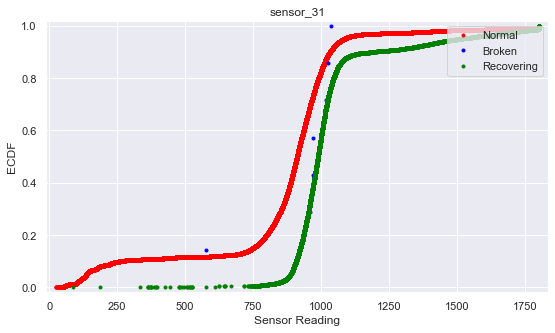

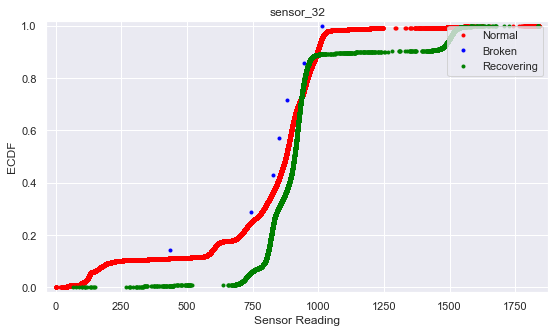

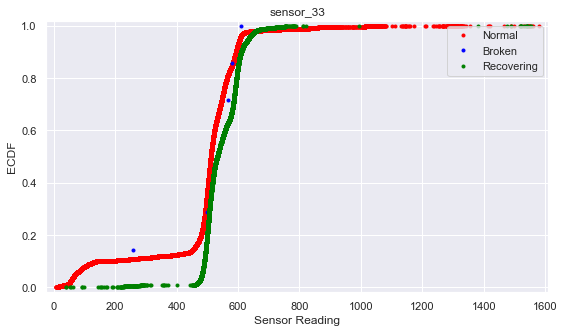

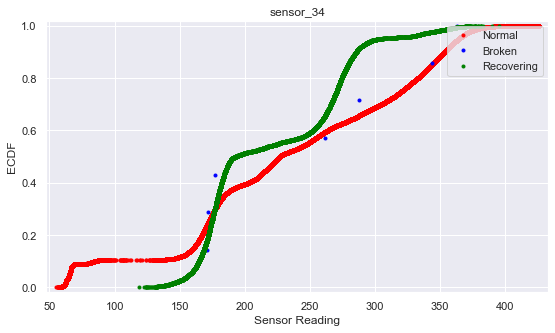

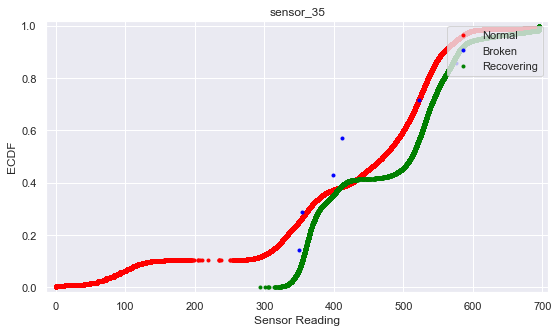

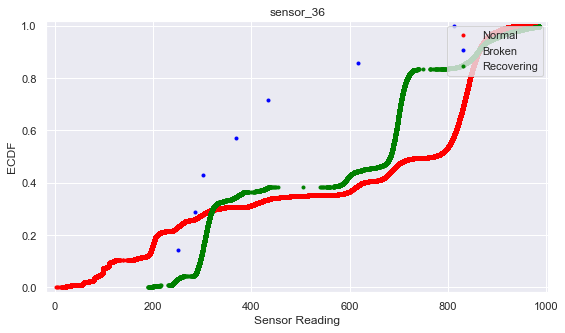

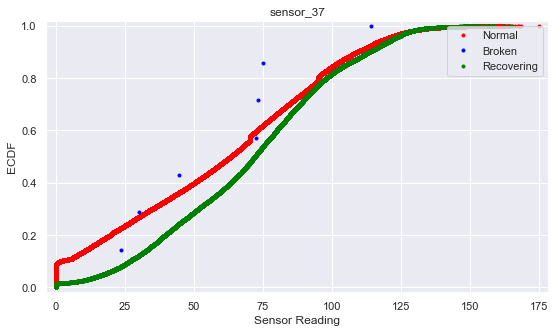

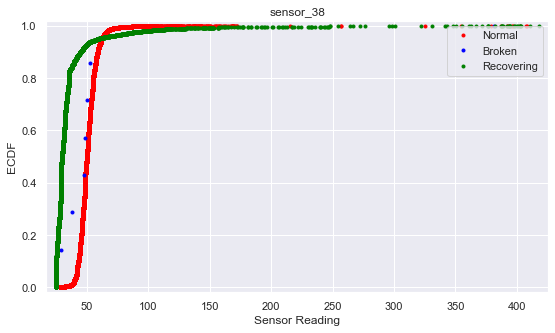

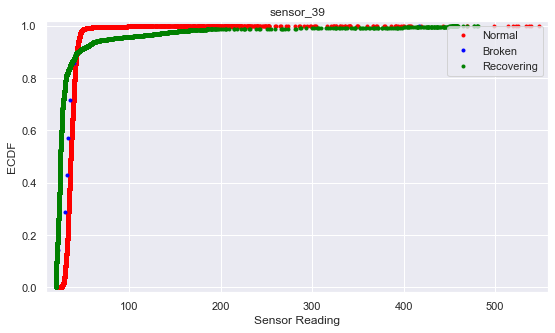

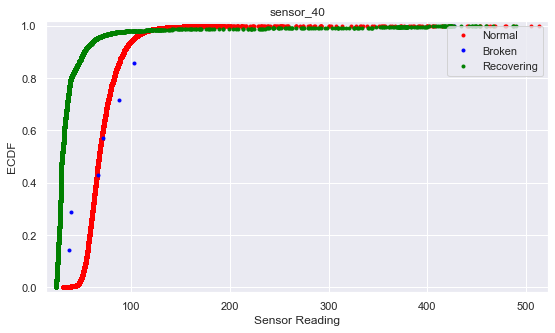

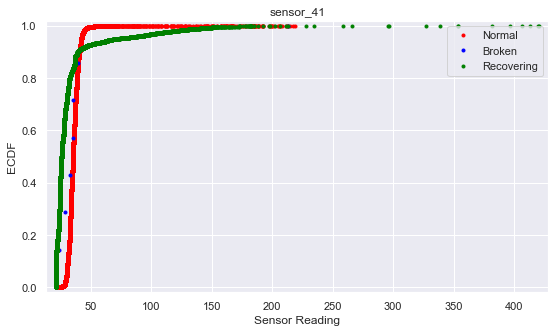

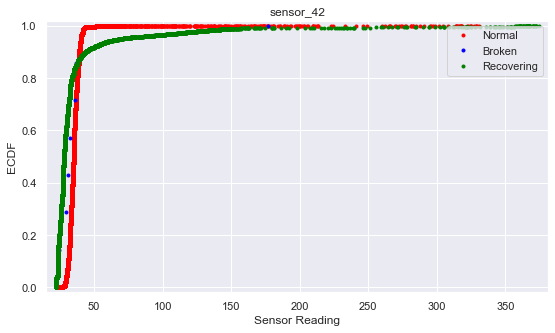

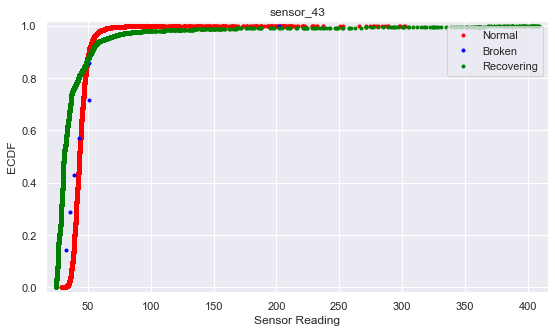

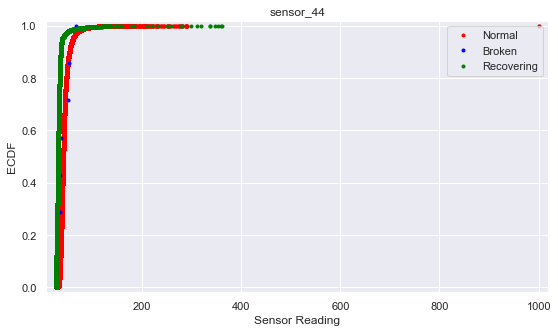

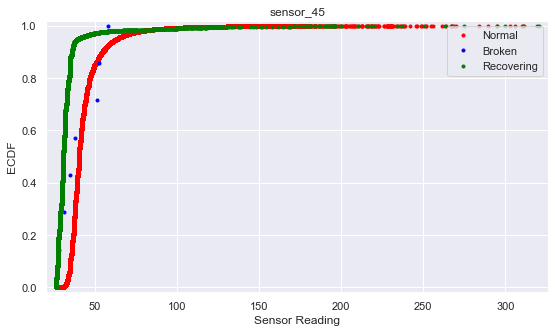

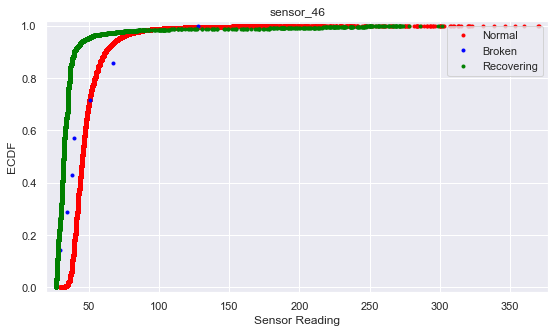

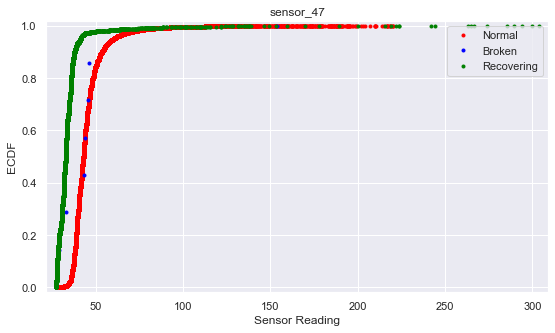

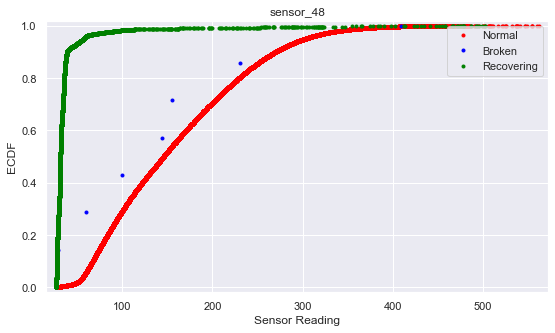

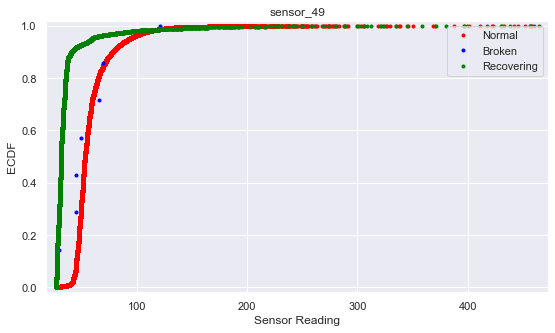

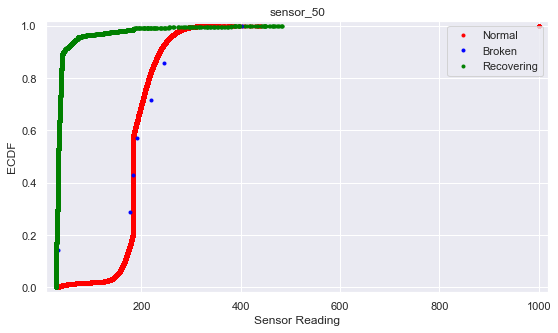

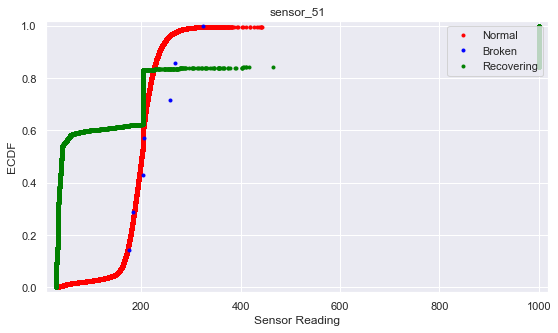

In [36]:
names=normal.drop('machine_status', axis=1).columns
for i, col in enumerate(names):
    x_norm, y_norm = ecdf(normal[col].values)
    x_broken, y_broken = ecdf(broken[col].values)
    x_rec, y_rec = ecdf(recovering[col].values)
    sns.set()
    _=plt.figure(figsize=(9,5))
    _=plt.plot(x_norm, y_norm, marker='.', color='red', linestyle='none', label='Normal')
    _=plt.plot(x_broken, y_broken, marker='.', color='blue', linestyle='none', label='Broken')
    _=plt.plot(x_rec, y_rec, marker='.', color='green', linestyle='none', label='Recovering')
    # Label the axes
    plt.xlabel('Sensor Reading')
    plt.ylabel('ECDF')
    plt.title(col)
    plt.legend(loc='upper right')
    plt.margins(0.02)
    # Display the plot
    plt.show()

__Boxplots__: Let's take a look at the outliers for each sensor by each state of the pump

<Figure size 432x288 with 0 Axes>

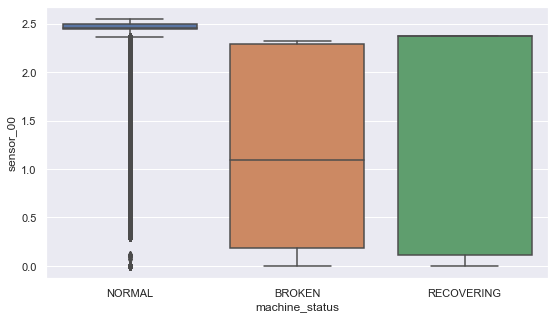

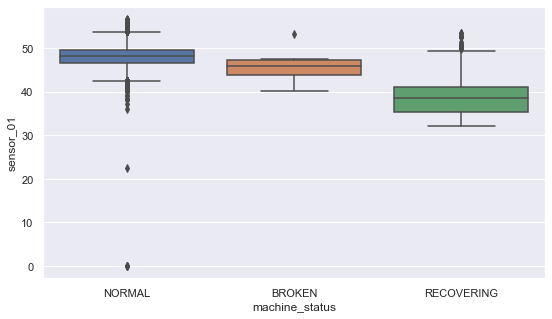

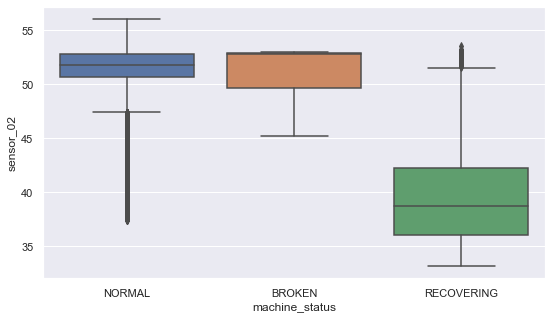

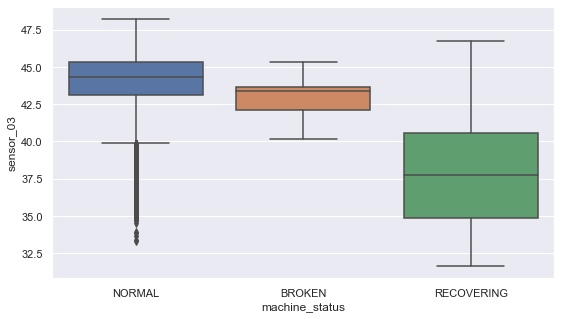

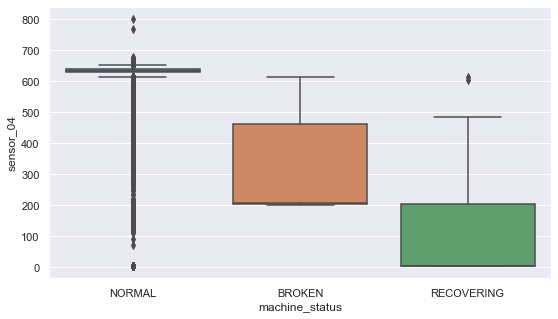

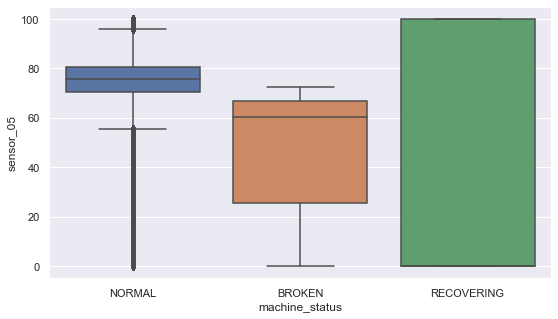

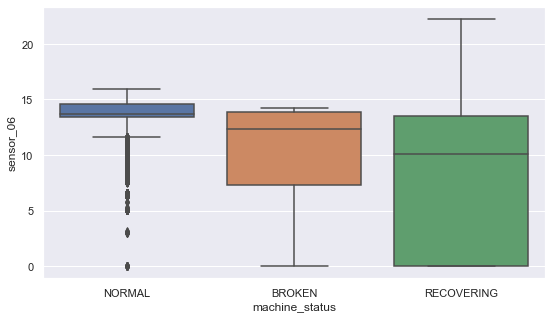

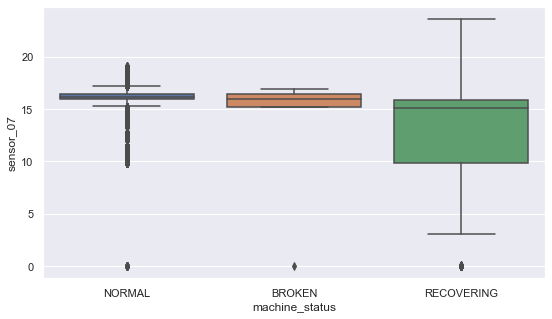

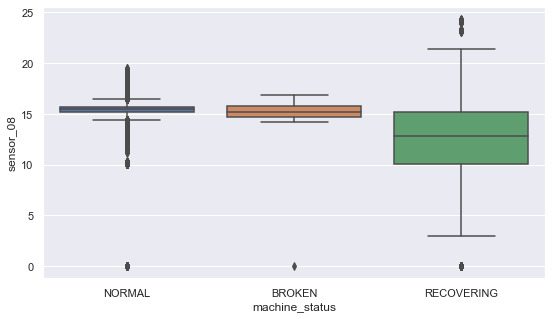

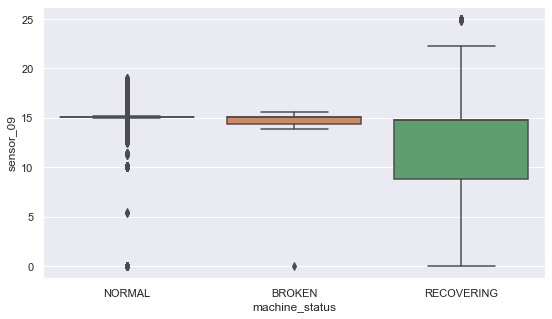

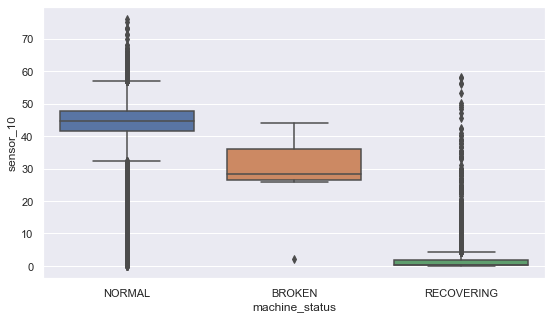

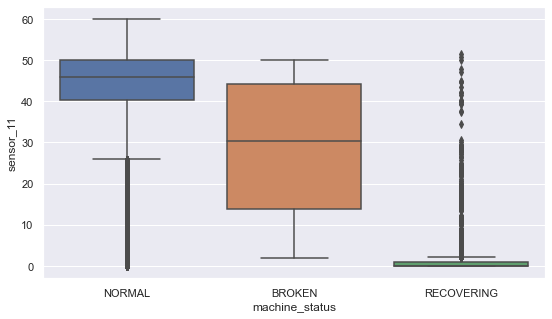

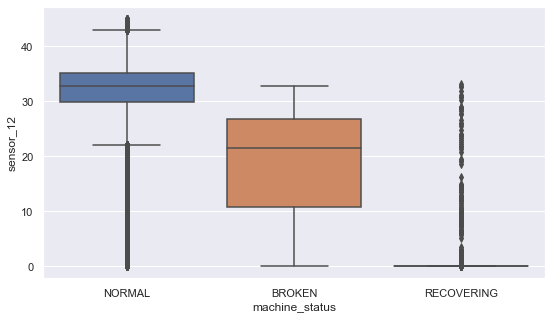

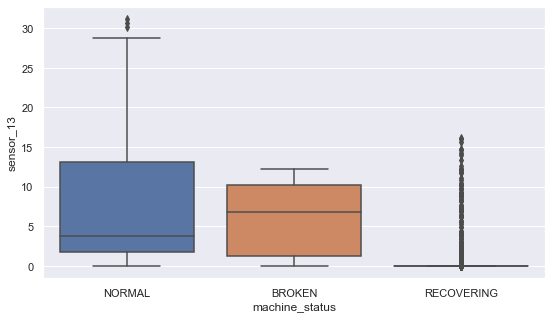

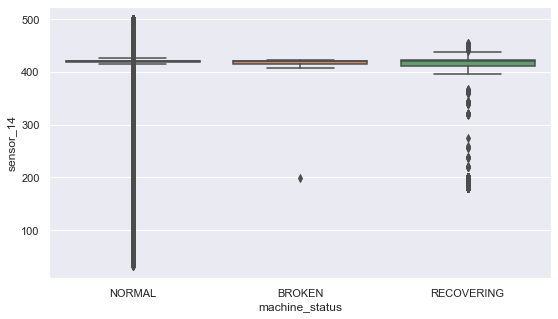

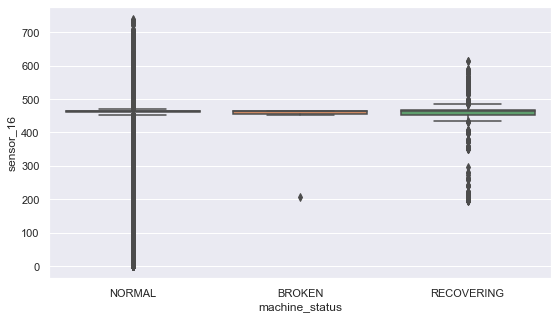

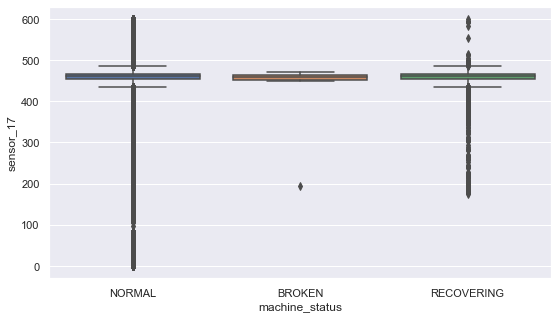

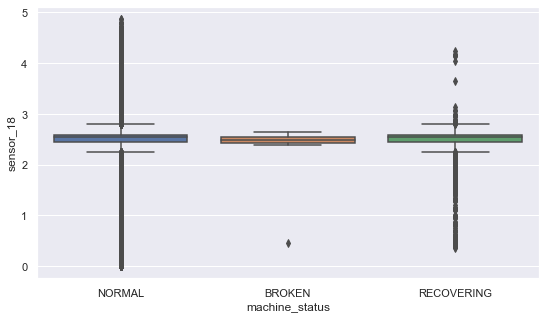

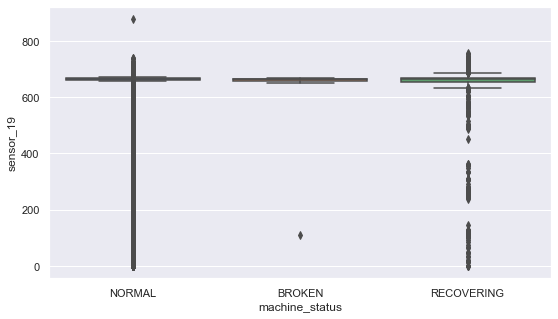

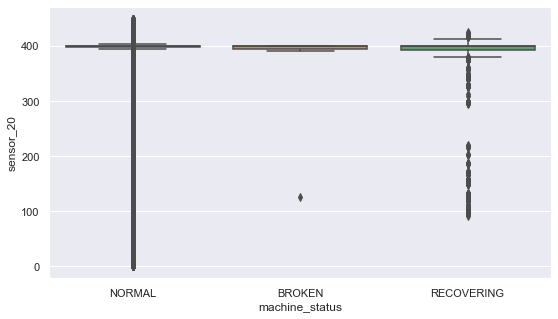

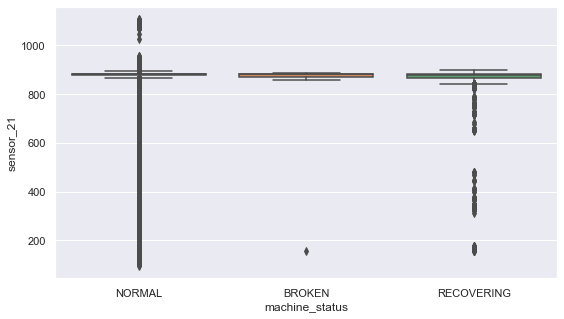

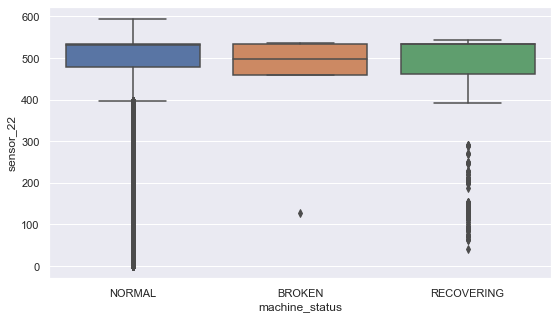

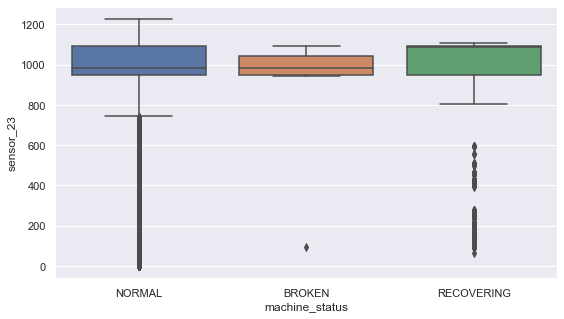

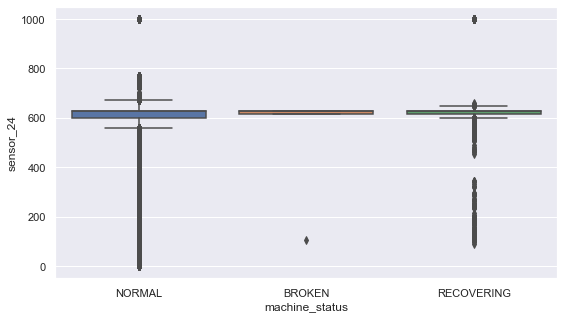

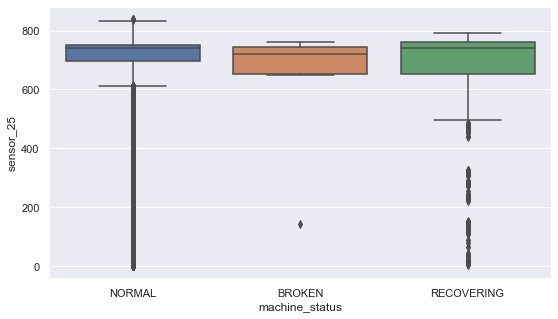

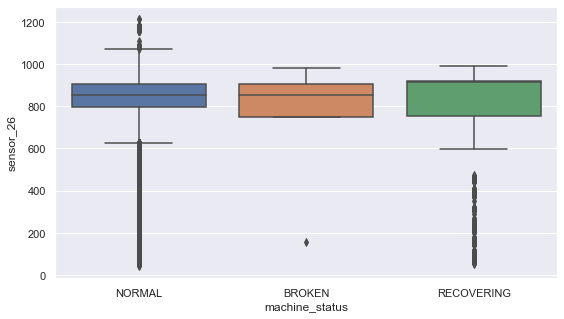

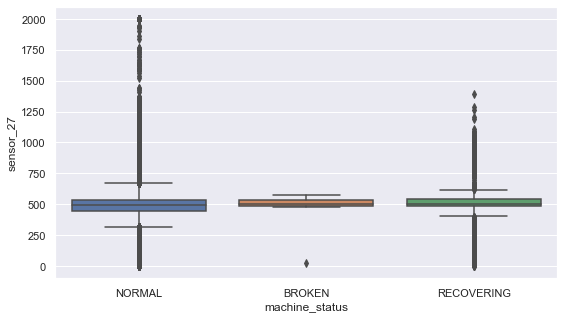

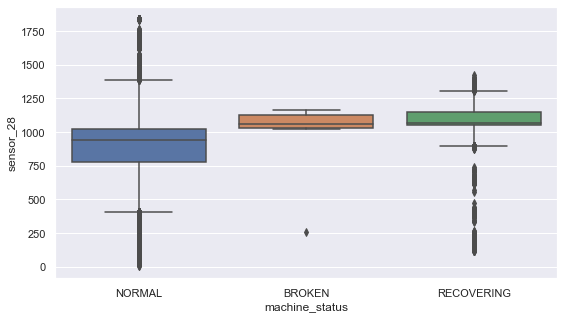

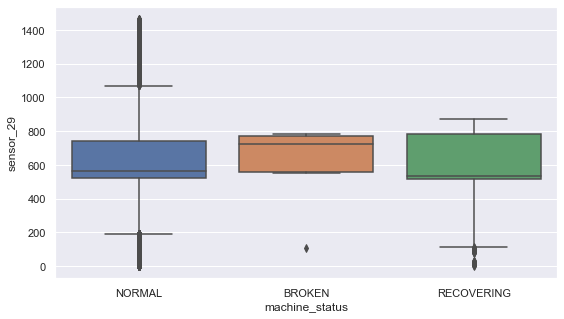

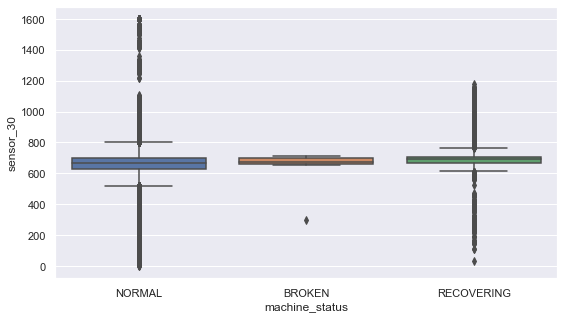

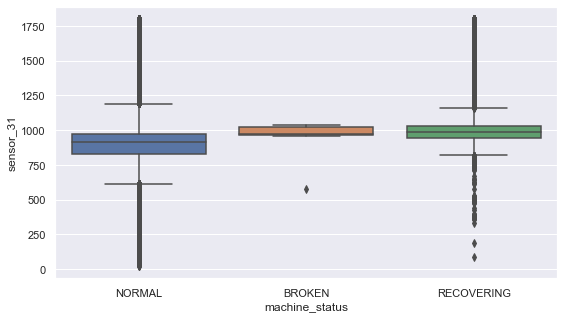

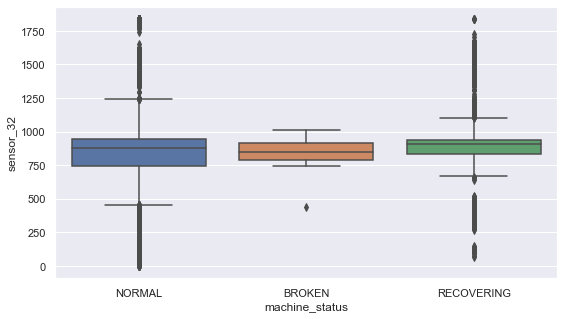

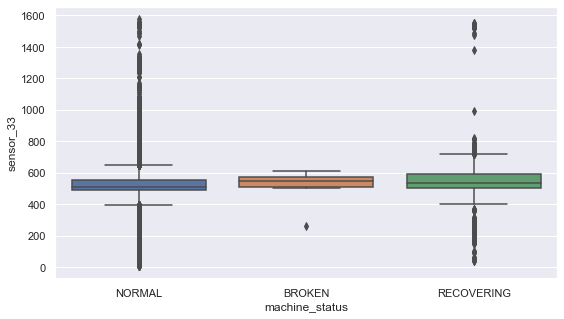

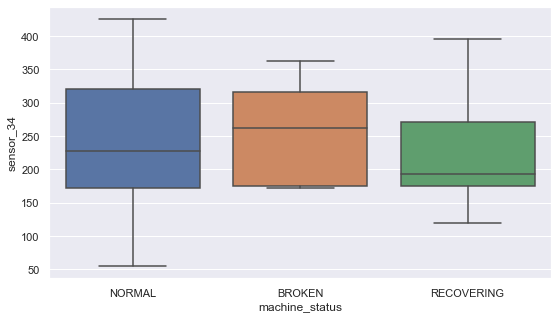

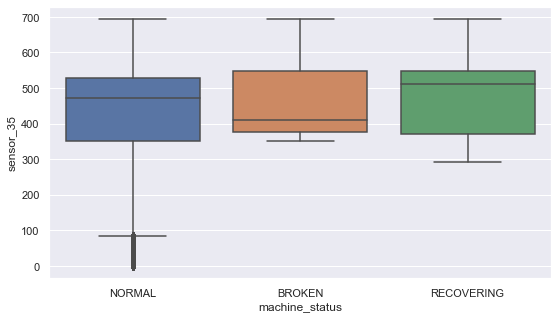

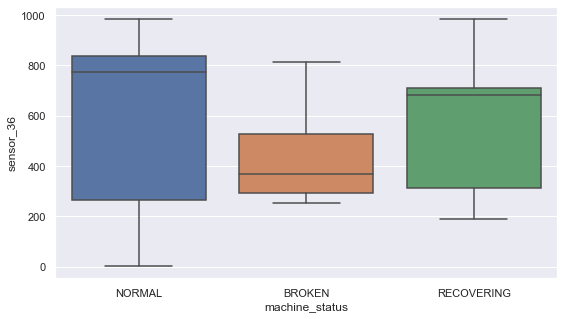

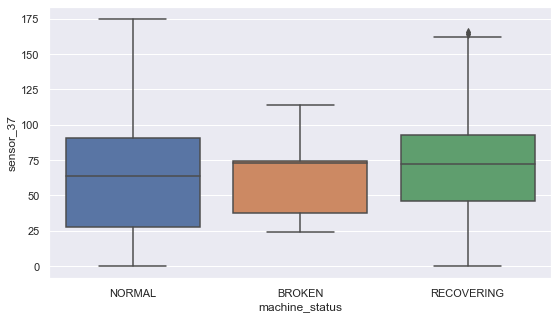

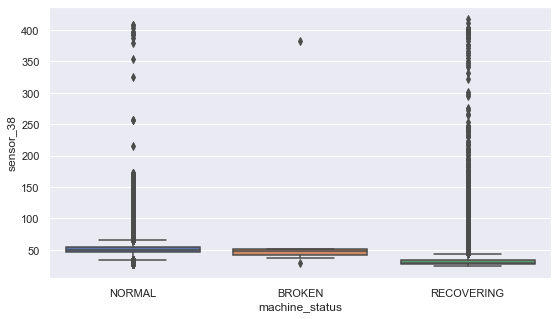

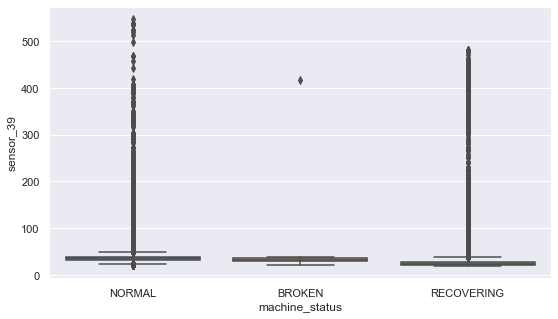

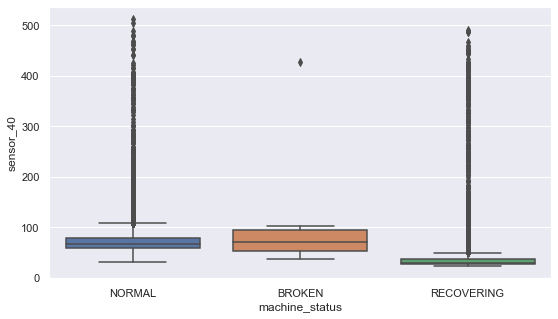

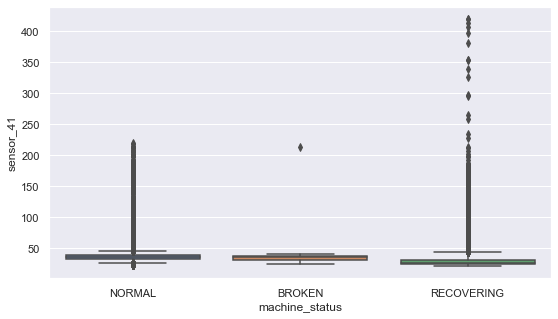

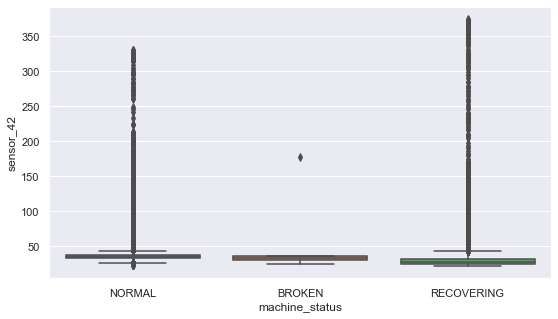

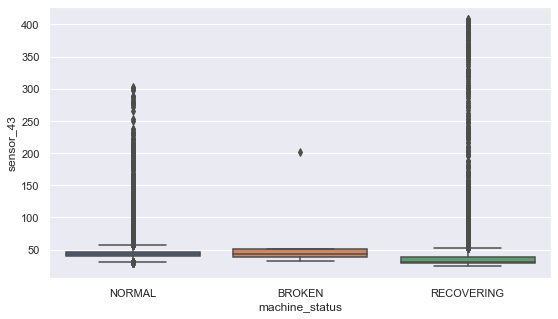

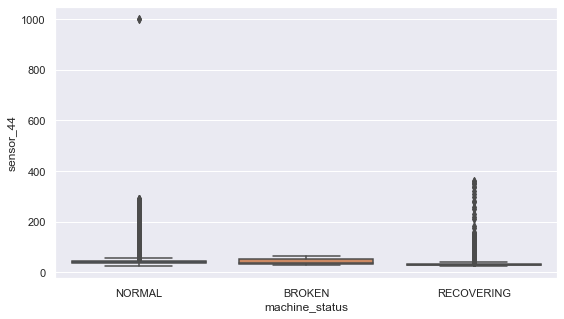

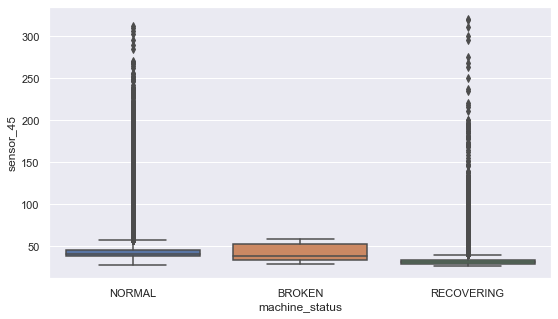

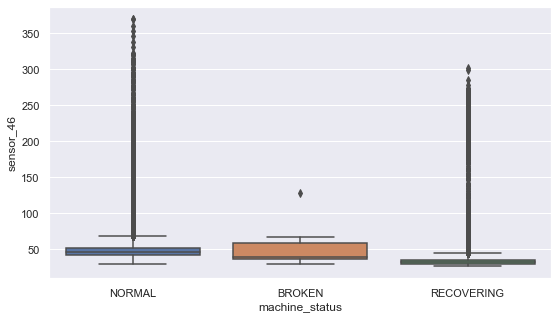

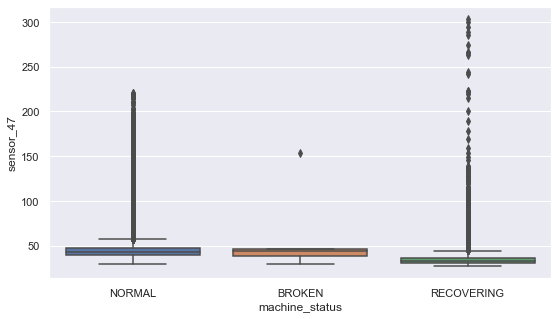

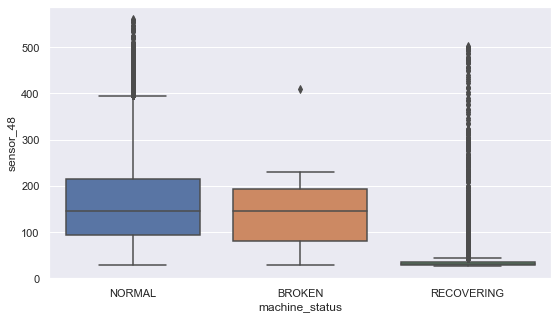

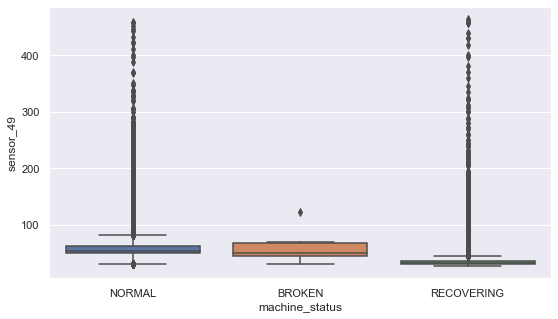

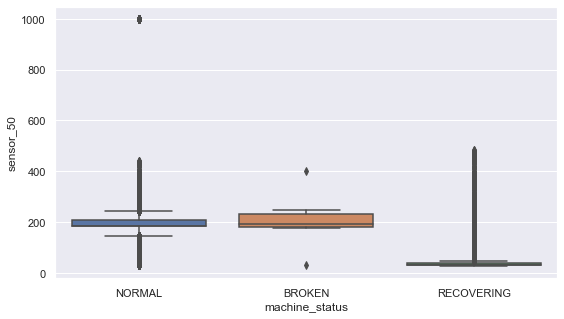

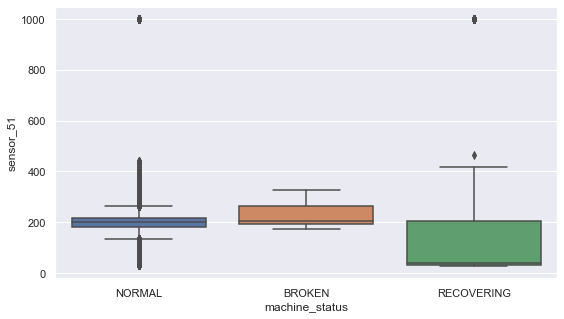

In [80]:
# Boxplot for each of the readings from the each sensor grouped by each of the different operating conditions of the pump
warnings.filterwarnings("ignore")
df_adj = df.drop('machine_status', 1)
for i, col in enumerate(df_adj.columns):
    plt.figure(i)
    plt.figure(figsize=(9,5))
    ax = sns.boxplot(x=df['machine_status'], y=df_adj[col])

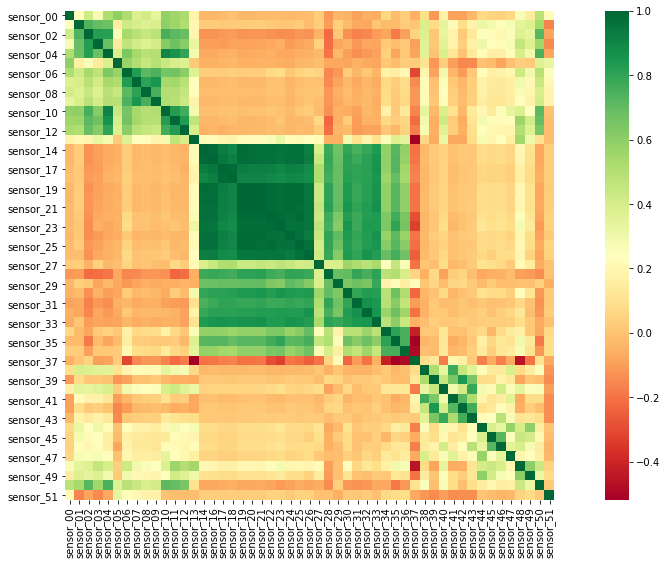

In [29]:
# Let's see a heatmap for correlation
_ = plt.figure(figsize=(18,9))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

## Step 4 Pre-processing and Training Data Development

#### 4.1:  Dummy Variable

In [10]:
df['machine_status'].value_counts()

NORMAL        205067
RECOVERING     14447
BROKEN             7
Name: machine_status, dtype: int64

In [11]:
df2=df.copy()

I will combine RECOVERING AND BROKEN states under a single class of 0 that implies NOT NORMAL situation. And I will label NORMAL state as 1 that implies NORMAL.

0: NOT NORMAL

1: NORMAL

In [12]:
df2.loc[df2['machine_status'] == 'RECOVERING', 'machine_status'] = 0
df2.loc[df2['machine_status'] == 'BROKEN', 'machine_status'] = 0
df2.loc[df2['machine_status'] == 'NORMAL', 'machine_status'] = 1

In [13]:
df2['machine_status'].value_counts()

1    205067
0     14454
Name: machine_status, dtype: int64

In [14]:
df2['machine_status'] = pd.to_numeric(df2['machine_status'])

#### 4.2:  Classes are imbalanced  - Bootstrapping

Address the imbalance in the data by exploring technique mentioned in the following article

https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

In [15]:
# Extract NOT NORMAL for bootstrapping 
NotNormal = df2[df2['machine_status']==0]

In [16]:
# Extract NORMAL 
Normal = df2[df2['machine_status']==1]

In [17]:
# NOT NORMAL
NotNormal.columns

Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51', 'machine_status', 'date'],
      dtype='object')

In [18]:
# Resample observations that is 40% of the original data set
bs_sample=NotNormal.sample(round(0.4*df2.shape[0]), replace=True)

In [19]:
bs_sample.shape

(87808, 53)

In [20]:
# Check and verify counts
bs_sample['machine_status'].value_counts()

0    87808
Name: machine_status, dtype: int64

In [21]:
# Reset the index
bs_sample.reset_index(drop=True, inplace=True)

In [22]:
# Combine bootstrap of NOT NORMAL and NORMAL into single dataframe
dfFinal = pd.concat([bs_sample, Normal]).reset_index(drop=True)

In [23]:
dfFinal['machine_status'].value_counts()

1    205067
0     87808
Name: machine_status, dtype: int64

#### 4.3:  Feature Scaling
The continuous variables in our dataset are at varying scales. For instance if you refer back to the histograms above you can see that the variable “sensor_00” ranges from 0 to 2.54, whilst “sensor_31” ranges from 24 to 1800. This poses a problem for many popular machine learning algorithms which often use Euclidian distance between data points to make the final predictions. Standardising the scale for all continuous variables can often result in an increase in performance of machine learning models. As the values don't follow normal distribution, I will use MinMaxScaler as opposed to StandardScaler.

Useful article about the topic: https://medium.com/vickdata/four-feature-types-and-how-to-transform-them-for-machine-learning-8693e1c24e80

In [24]:
from sklearn import preprocessing
cols = ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51']
x = dfFinal[cols]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled = pd.DataFrame(x_scaled, columns=cols)
add = dfFinal.drop(cols, axis=1)
df_scaled = pd.concat([scaled, add], axis=1)
df_scaled.columns

Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51', 'machine_status', 'date'],
      dtype='object')

In [25]:
df_scaled['machine_status'].value_counts()

1    205067
0     87808
Name: machine_status, dtype: int64

#### 4.5:  Dimensionality Reduction with PCA

In [50]:
from sklearn.decomposition import PCA
features=['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51']
pca = PCA(n_components=2)
x = df_scaled.loc[:, features].values
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca1', 'pca2'])

In [51]:
finalDf = pd.concat([principalDf, df_scaled[['machine_status']]], axis = 1)

In [52]:
finalDf.head()

pca1      pca2  machine_status
0 -1.060933  0.794403               0
1 -1.209013  0.541139               0
2 -1.062210  0.259627               0
3 -1.160121  0.485378               0
4 -1.009664  0.534722               0

In [53]:
finalDf['machine_status'].value_counts()

1    205067
0     87808
Name: machine_status, dtype: int64

In [54]:
pca.explained_variance_ratio_

array([0.38551667, 0.2953748 ])

In [55]:
finalDf.describe().T

count          mean       std       min       25%  \
pca1            292875.0 -4.903778e-15  0.823811 -1.655622 -0.897425   
pca2            292875.0 -6.510926e-15  0.721096 -0.912621 -0.594510   
machine_status  292875.0  7.001861e-01  0.458177  0.000000  0.000000   

                     50%       75%       max  
pca1            0.218772  0.357746  2.189725  
pca2           -0.263094  0.448439  2.444889  
machine_status  1.000000  1.000000  1.000000

## Step 5 Modeling

In [27]:
# Prepare x and y - let's start with four features (sensors 04, 28, 31, 36) as per what was discovered from EDA
features = ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51']
x=df_scaled[features]
y=df_scaled['machine_status']

In [28]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=21, stratify=y)

#### 5.1: KNN - Unscaled Data

In [59]:
# Train KNN on training set with k=6
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)

In [60]:
# Calculate accuracy
knn.score(x_test, y_test)

0.9997951356088456

In [61]:
# Look at the prediction outcome
unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [26361 61502]]


In [62]:
# Look at the labels from the actual test set
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [26343 61520]]


#### 5.2: KNN - Scaled Data

In [ ]:
# Import libaries
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")
# Prepare data
x = df2[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51']]
y = df2['machine_status']
# Setup the pipeline
steps = [('scaler', StandardScaler()),('knn', KNeighborsClassifier())]
# Create the pipeline
pipeline = Pipeline(steps)
# Setup the hyperparameter grid
param_grid = {'knn__n_neighbors': np.arange(1,15)}
# Create train and test sets (hold-out sets)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
# Instantiate the GridSearchCV
knn_cv = GridSearchCV(pipeline, param_grid, cv=5)
# Fit to the training set
knn_cv.fit(x_train, y_train)
# Predict the labels of the test set
y_pred = knn_cv.predict(x_test)
# Compute and print metrics
print("Accuracy: {}".format(knn_cv.best_score_))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(knn_cv.best_params_))

In [115]:
unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [26361 61502]]


#### 5.3: KNN - PCA

In [128]:
# Import libaries
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import warnings
# Prepare x and y - let's start with four features (sensors 04, 28, 31, 36) as per what was discovered from EDA
x=finalDf[['pca1', 'pca2']]
y=finalDf['machine_status']
# Set up steps
steps = [('knn', KNeighborsClassifier())]
# Create the pipeline
pipeline = Pipeline(steps)
# Setup the hyperparameter grid
param_grid = {'knn__n_neighbors': np.arange(1,50)}
# Create train and test sets (hold-out sets)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
# Instantiate the GridSearchCV
knn_cv = GridSearchCV(pipeline, param_grid, cv=5)
# Fit to the training set
knn_cv.fit(x_train, y_train)
# Predict the labels of the test set
y_pred = knn_cv.predict(x_test)
# Compute and print metrics
print("Accuracy: {}".format(knn_cv.best_score_))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(knn_cv.best_params_))

0.9957206104958857

#### 5.4: Logistic Regression - Unscaled Data

In [32]:
# Import libaries
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")
# Prepare data
x = df2[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51']]
y = df2['machine_status']
# Setup the pipeline
steps = [('logreg', LogisticRegression())]
# Create the pipeline
pipeline = Pipeline(steps)
# Setup the hyperparameter grid
param_grid = {'logreg__C': np.logspace(-5, 8, 15)}
# Create train and test sets (hold-out sets)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
# Instantiate the GridSearchCV
logreg_cv = GridSearchCV(pipeline, param_grid, cv=5)
# Fit to the training set
logreg_cv.fit(x_train, y_train)
# Predict the labels of the test set
y_pred = logreg_cv.predict(x_test)
# Compute and print metrics
print("Accuracy: {}".format(logreg_cv.score(x_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(logreg_cv.best_params_))

Accuracy: 0.9957179950498808
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4336
           1       1.00      1.00      1.00     61521

    accuracy                           1.00     65857
   macro avg       0.98      0.99      0.98     65857
weighted avg       1.00      1.00      1.00     65857

Tuned Model Parameters: {'logreg__C': 0.05179474679231213}


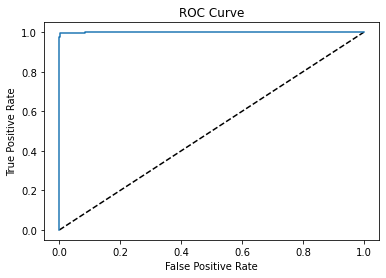

In [33]:
# ROC curve
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_cv.predict_proba(x_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [34]:
len(fpr), len(tpr), len(thresholds)

(935, 935, 935)

#### 5.5: Logistic Regression - Scaled Data

In [31]:
# Import libaries
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")
# Prepare data
x = df2[['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50',
       'sensor_51']]
y = df2['machine_status']
# Setup the pipeline
steps = [('scaler', StandardScaler()), ('logreg', LogisticRegression())]
# Create the pipeline
pipeline = Pipeline(steps)
# Setup the hyperparameter grid
param_grid = {'logreg__C': np.logspace(-5, 8, 15)}
# Create train and test sets (hold-out sets)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
# Instantiate the GridSearchCV
logreg_cv = GridSearchCV(pipeline, param_grid, cv=5)
# Fit to the training set
logreg_cv.fit(x_train, y_train)
# Predict the labels of the test set
y_pred = logreg_cv.predict(x_test)
# Compute and print metrics
print("Accuracy: {}".format(logreg_cv.score(x_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(logreg_cv.best_params_))

Accuracy: 0.9981171325751249
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4336
           1       1.00      1.00      1.00     61521

    accuracy                           1.00     65857
   macro avg       0.99      0.99      0.99     65857
weighted avg       1.00      1.00      1.00     65857

Tuned Model Parameters: {'logreg__C': 11787686.347935867}


#### 5.6: Logistic Regression - PCA

In [131]:
x=finalDf[['pca1', 'pca2']]
y=finalDf['machine_status']
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=21, stratify=y)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[26171   172]
 [  660 60860]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     26343
           1       1.00      0.99      0.99     61520

    accuracy                           0.99     87863
   macro avg       0.99      0.99      0.99     87863
weighted avg       0.99      0.99      0.99     87863



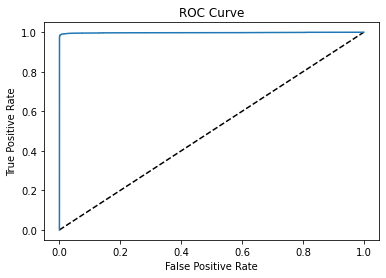

In [132]:
# ROC curve
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(x_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#### 5.7: Decision Tree

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
# Declare a variable called gini_model and use tree.DecisionTreeClassifier. 
gini_model = tree.DecisionTreeClassifier(criterion='gini', random_state=46)
# Set up pipeline steps
steps = [('gini', gini_model)]
pipeline = Pipeline(steps)
# Declare max_depth parameter values
param_grid = {'gini__max_depth': [0, 3, 5, 7, 9]}
# Instantiate GridSearchCV
gini_cv = GridSearchCV(pipeline, param_grid, cv=5)
# Call fit() on entr_model
gini_cv.fit(x_train, y_train)
# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = gini_cv.predict(x_test)
# Call Series on our y_pred variable with the following: pd.Series(y_pred)
pd.Series(y_pred)
# Check out entr_model
gini_cv

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('gini',
                                        DecisionTreeClassifier(random_state=46))]),
             param_grid={'gini__max_depth': [0, 3, 5, 7, 9]})

In [67]:
# Evaulate the cross-validation gini model
from sklearn import metrics
print("Gini impurity model - Cross Validation")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))
print("Tuned Model Parameters: {}".format(gini_cv.best_params_))

Gini impurity model - Cross Validation
Accuracy: 0.9992829746309596
Balanced accuracy: 0.9994879713914174
Precision score 1.0
Recall score 1.0
Tuned Model Parameters: {'gini__max_depth': 9}


In [68]:
np.unique(y_pred, return_counts=True)

(array([0, 1], dtype=int64), array([26406, 61457], dtype=int64))

In [69]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([26343, 61520], dtype=int64))

#### 5.8 Random Forest

In [34]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
# Instantiate Random Forest Classifier
rf = RandomForestClassifier(random_state=46)
# Fit the model to the training set
rf.fit(x_train, y_train)
# Predict with the model
y_pred = rf.predict(x_test)
# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

In [33]:
# Evaulate the Random Forest
from sklearn import metrics
print("Random Forest")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Random Forest
Accuracy: 0.9999430932246793
Balanced accuracy: 0.9999485098727812
Precision score 0.9999837443308354
Recall score 0.999962039251414
